In [1]:
%load_ext autoreload

In [2]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import build_dataset
import dataframe_exploration

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [3]:
wt_instance = build_dataset.wt_data.load_instance("WTG03",load_minimal=False)



Loading WTG03...
Loaded WTG03


In [5]:
# ----- Used to create and build a csv file of the data set -----


df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=0,plot=False, bins=50, 
                                                         plot_vertical_lines=False)

build_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_WTG03.csv')


../data_processing/ff_transform.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  amp = fft_modulus_norm[filter_indexes]


415 / 417 intervals added to dataframe
Saved GbxHssRr_RMS_WTG03.csv.


### Correlation plot, unfiltered data set

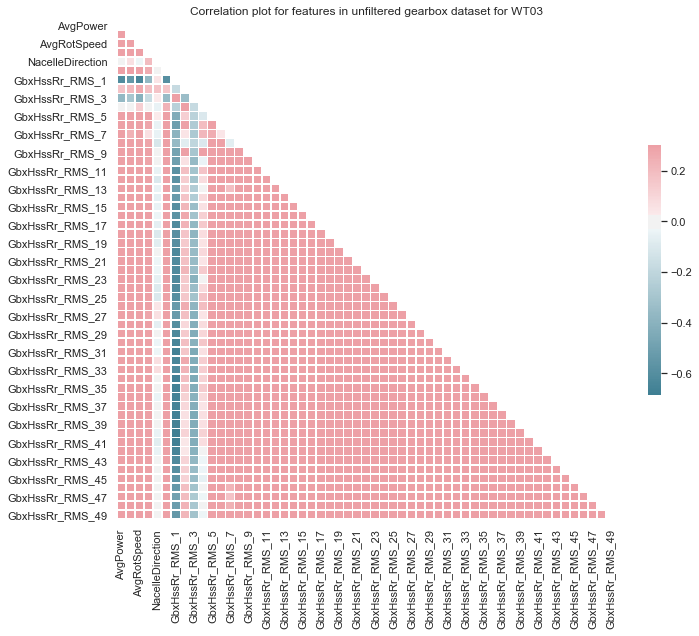

In [6]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG03.csv'
save_to_file_name = "Correlation_plot_wtg03_Gearbox"
plot_title = "Correlation plot for features in unfiltered gearbox dataset for WT03"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

### Correlation plot, filtered data set

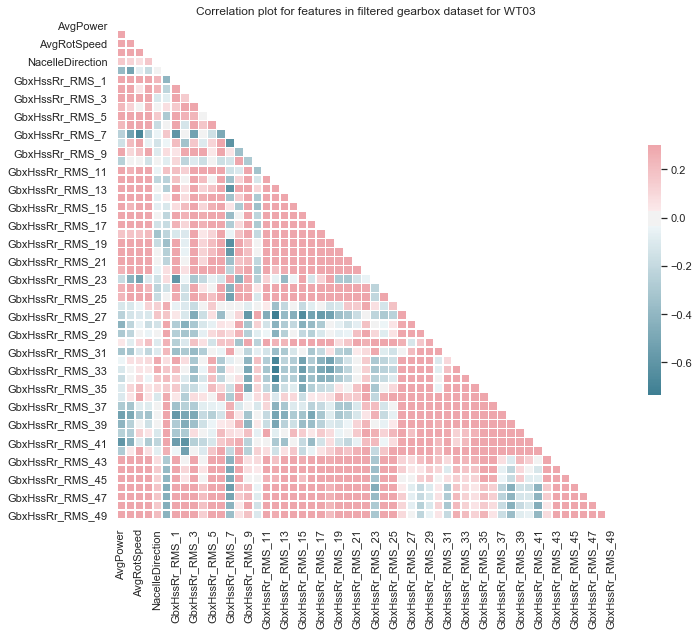

In [7]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG03.csv'
save_to_file_name = "Correlation_plot_wtg03_Gearbox"
plot_title = "Correlation plot for features in filtered gearbox dataset for WT03"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

### Load data set from csv file

In [8]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG03.csv'
data = pd.read_csv(path)
data.head()

AvgPower     ActPower  AvgRotSpeed  WindSpeed  NacelleDirection  \
0  2953.059326  3062.600098  1488.567668       12.2        211.300003   
1  2506.833740  2213.600098  1455.100147        9.8        210.300003   
2  2638.403320  2538.399902  1471.569062       10.2         36.900002   
3  2603.288818  2243.100098  1453.689477        9.9        110.800003   
4  3289.359131  3477.300049  1473.524626       13.1        229.699997   

   GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  GbxHssRr_RMS_3  \
0        0.390282        0.315728        0.603908        0.369451   
1        0.463516        0.248339        0.590697        0.329584   
2        0.428963        0.267683        0.550062        0.370543   
3        0.476629        0.227889        0.530220        0.345882   
4        0.440963        0.308199        0.901247        0.363823   

   GbxHssRr_RMS_4  ...  GbxHssRr_RMS_40  GbxHssRr_RMS_41  GbxHssRr_RMS_42  \
0        0.574504  ...         2.035909         2.305540         2.283667   
1        0.457916  ...         2.326461         2.544607         2.235011   
2        0.543707  ...         2.454726         2.610456         2.332728   
3        0.487592  ...         2.328120         2.681551         2.241917   
4        0.615123  ...         2.276761         2.080086         1.935870   

   GbxHssRr_RMS_43  GbxHssRr_RMS_44  GbxHssRr_RMS_45  GbxHssRr_RMS_46  \
0         2.588069         3.470153         2.404919         1.292162   
1         2.399166         2.841204         2.206481         1.002734   
2         2.421368         3.103490         2.372697         1.033393   
3         2.307687         2.758945         1.844706         0.916697   
4         2.498416         3.261097         2.315266         1.290084   

   GbxHssRr_RMS_47  GbxHssRr_RMS_48  GbxHssRr_RMS_49  
0         0.834689         0.448532         0.220187  
1         0.570204         0.369731         0.177383  
2         0.703453         0.376279         0.182246  
3         0.545712         0.346259         0.162629  
4         0.842055         0.554681         0.225183  

[5 rows x 55 columns]

## Plot average rot speed (high speed shaft) for all intervals with avg_power > 2500

color codes: 
red: hgih rot speed which gives high rms values in bin 5

yellow: low rot speeds which gives high rms values in bin 1,2 or 3. The first line at interval 30 (with very low 
rot speed) has only high rot speed in bin 1

light blue: high rot speed but regular rms values

green horisontal line: 1550 rpm (rotational speed)

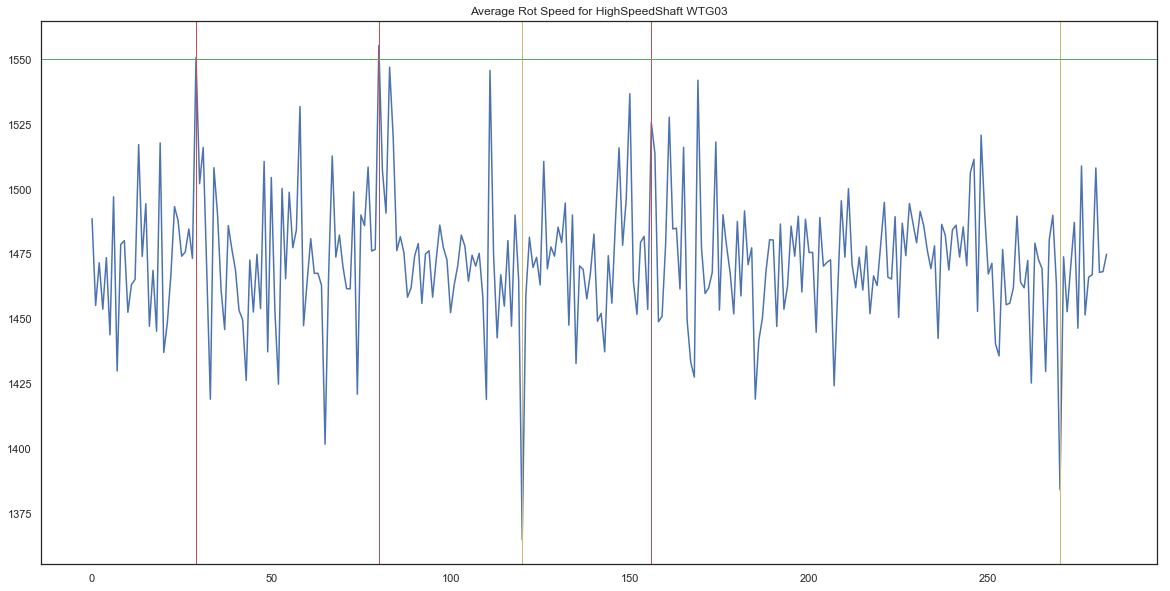

In [50]:
x = np.arange(data.shape[0])
y = data['AvgRotSpeed']
plt.figure(figsize=(20,10))
plt.title('Average Rot Speed for HighSpeedShaft WTG03')
plt.plot(x, y)
plt.axvline(x=29, c='r', linewidth=1)
plt.axvline(x=80,  c='r', linewidth=1)
plt.axvline(x=120, c='y', linewidth=1)
plt.axvline(x=156, c='r', linewidth=1)
plt.axvline(x=270, c='y', linewidth=1)
plt.axhline(y=1550, c='g', linewidth=1)
plt.show()

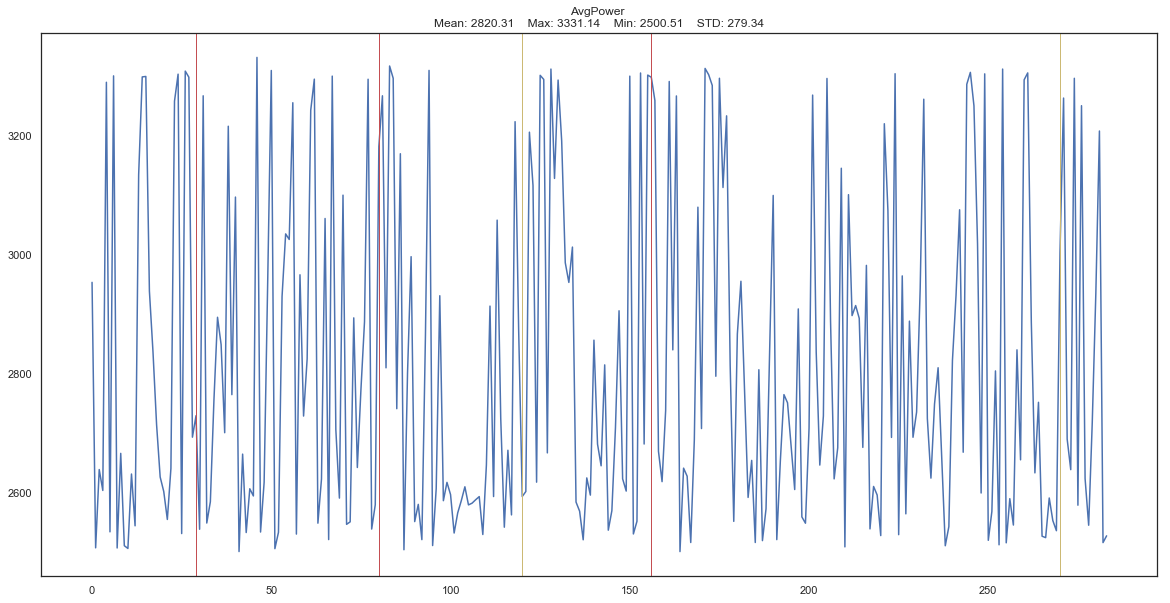

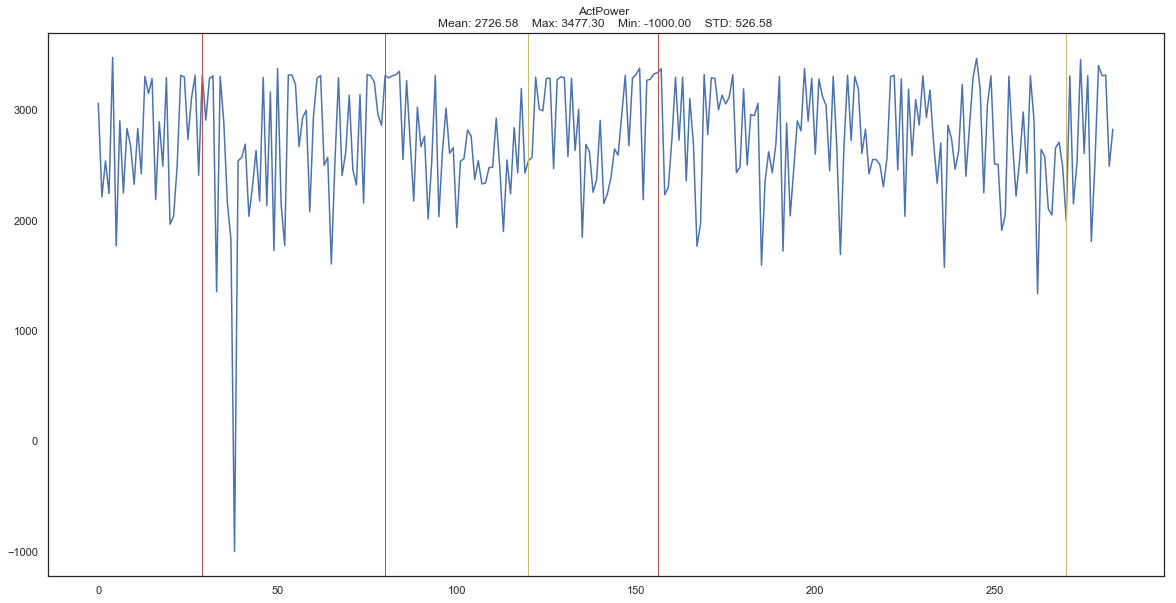

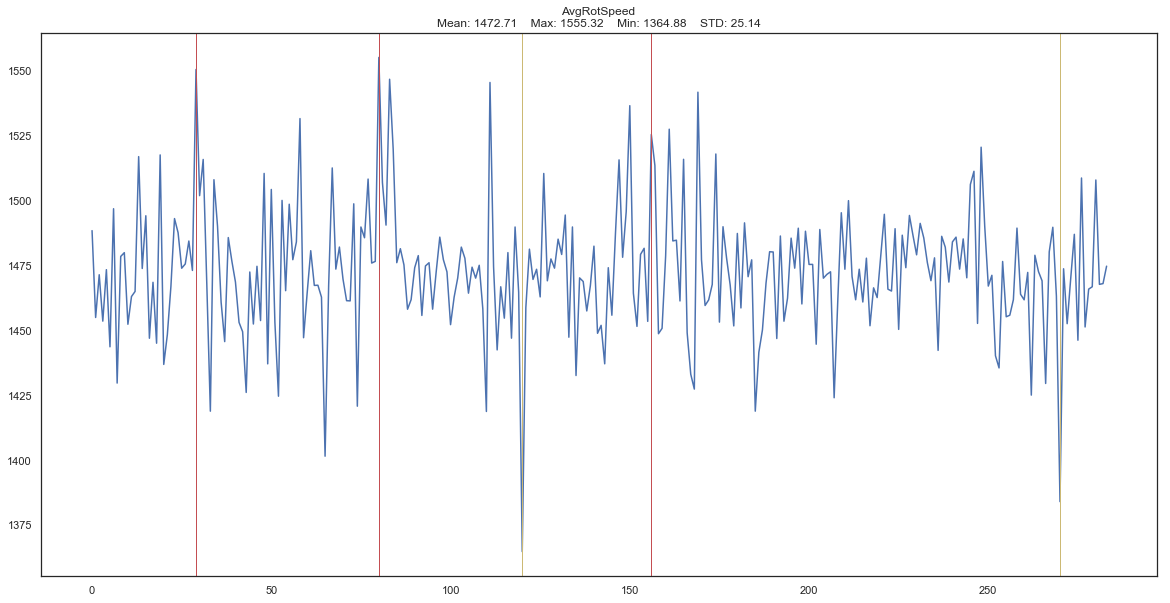

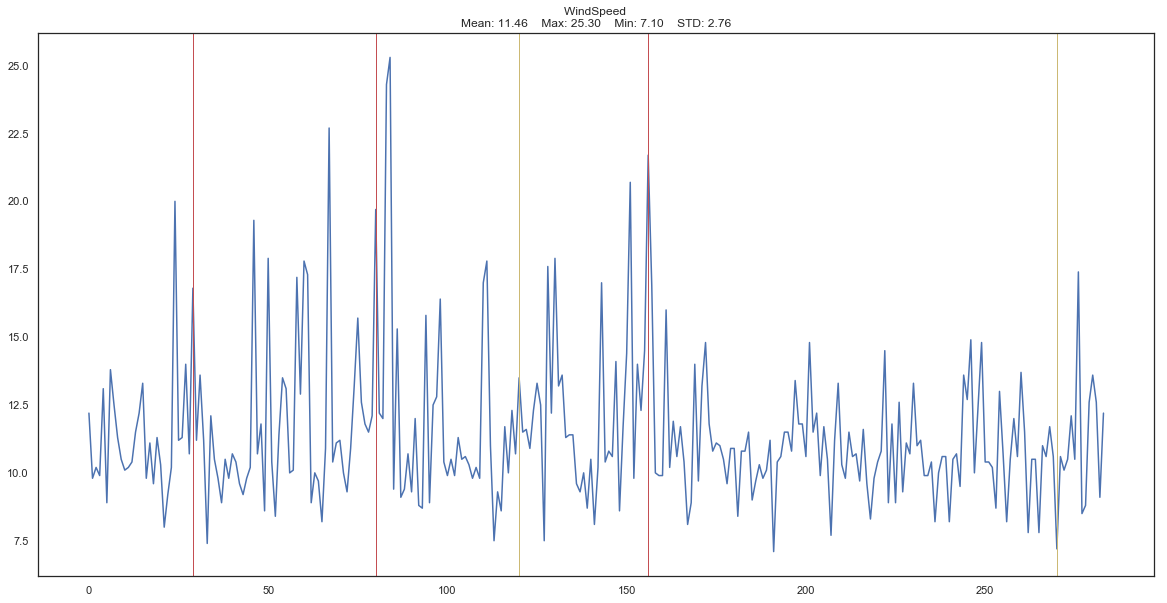

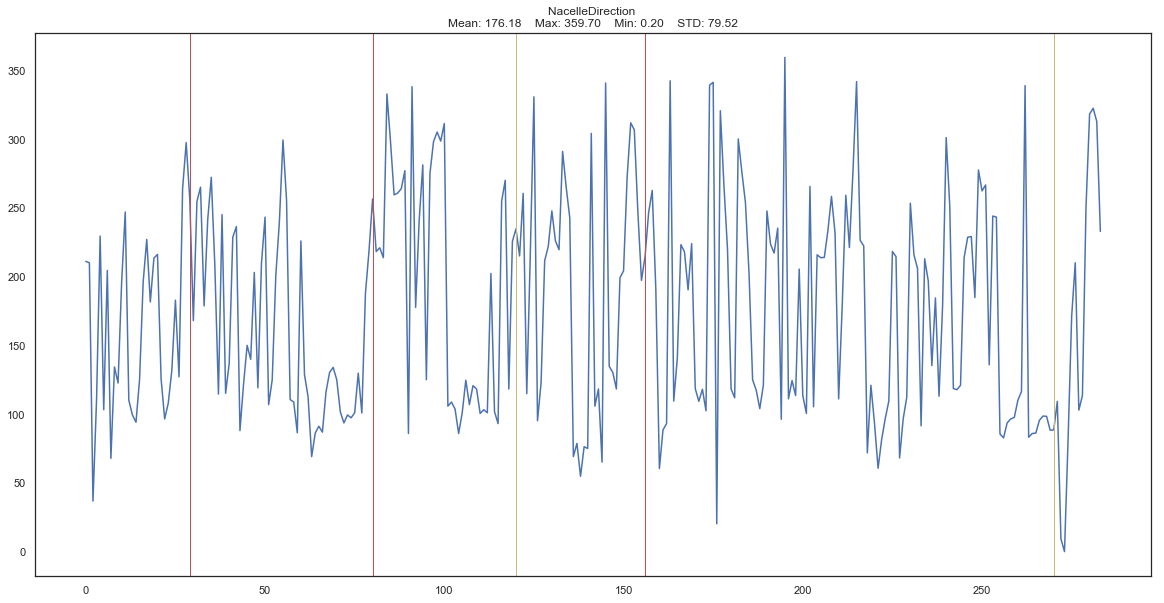

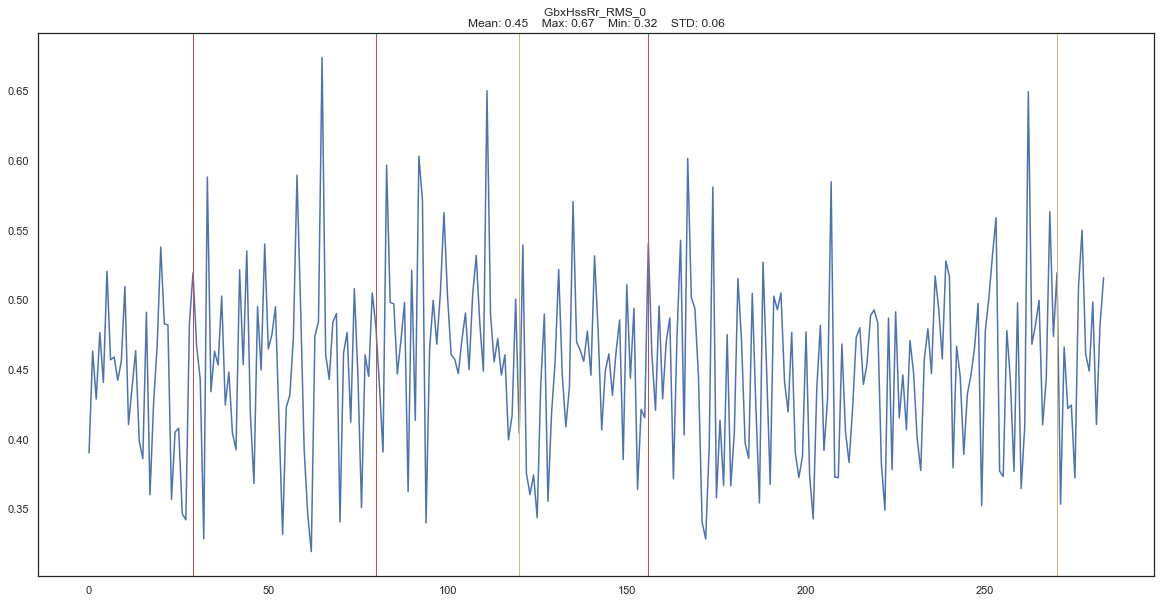

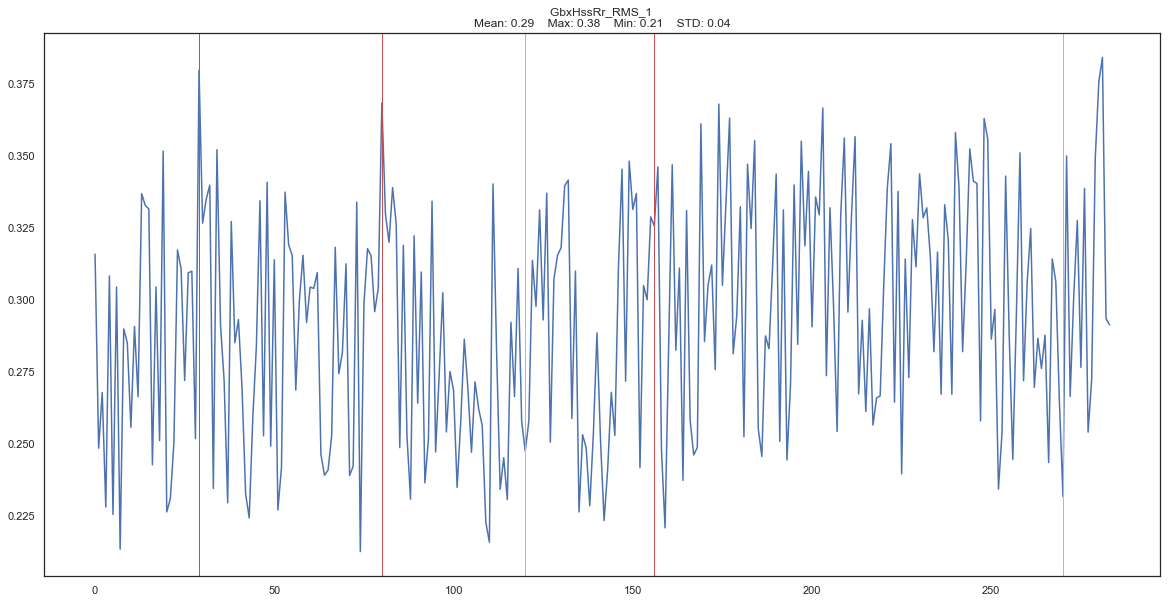

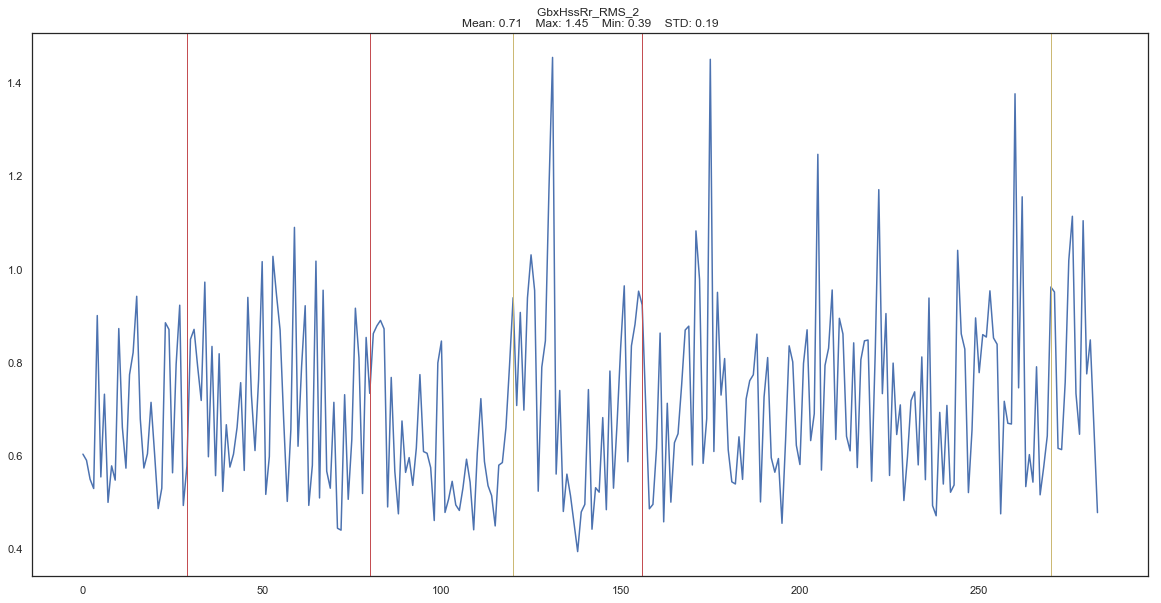

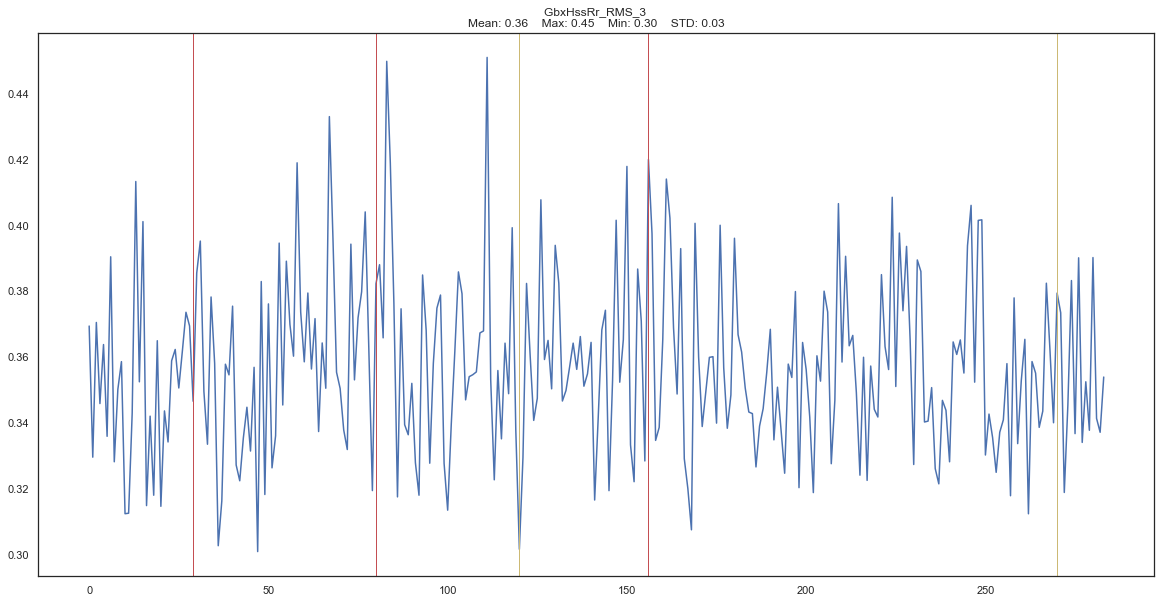

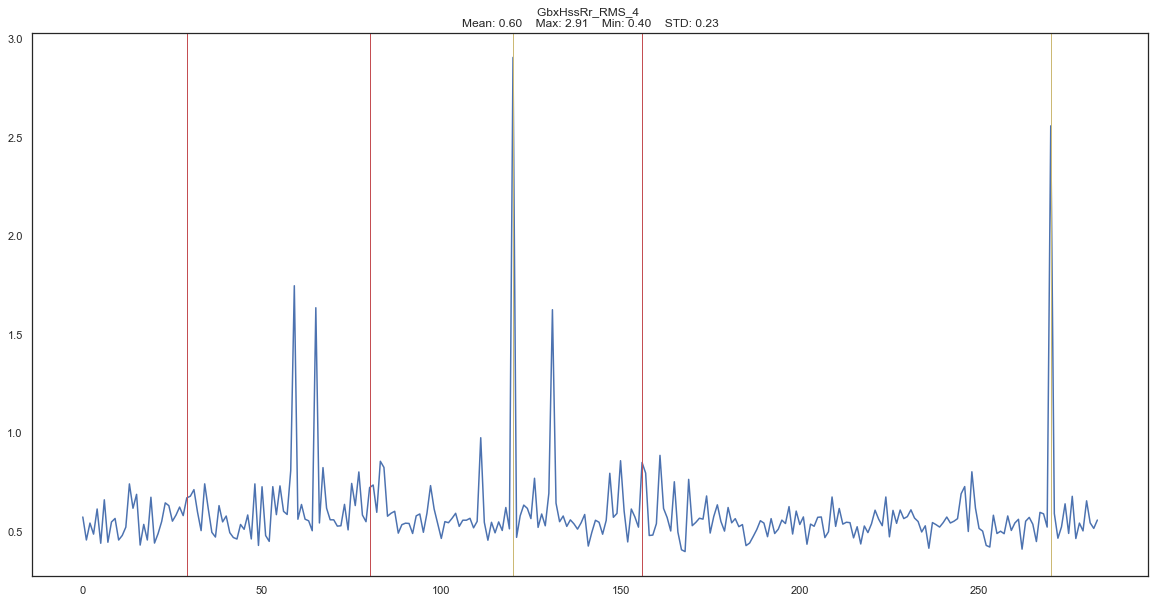

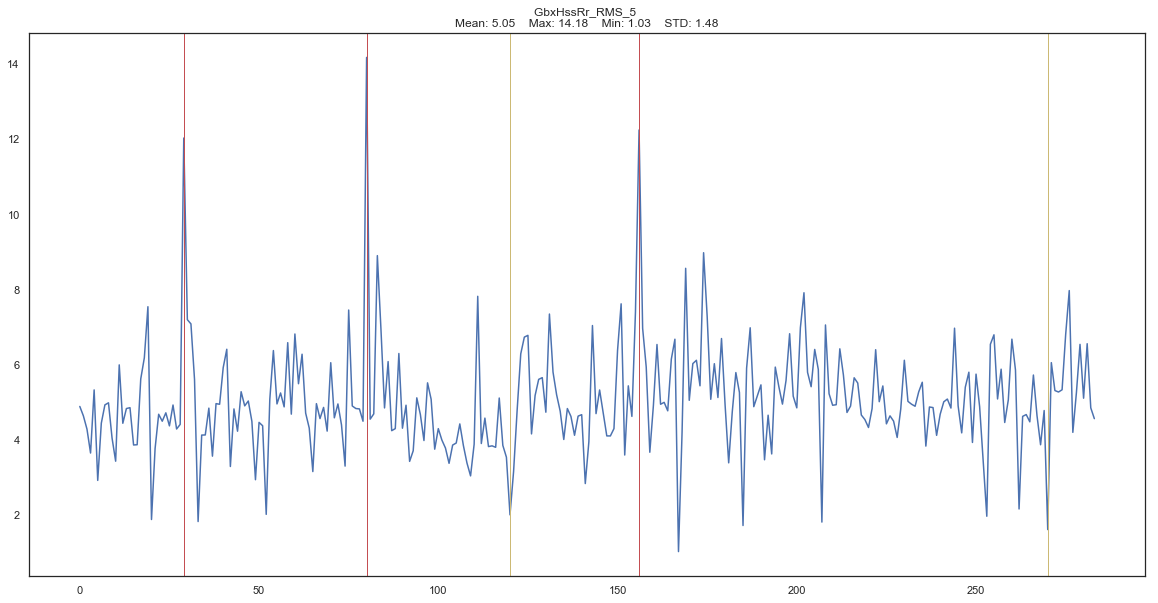

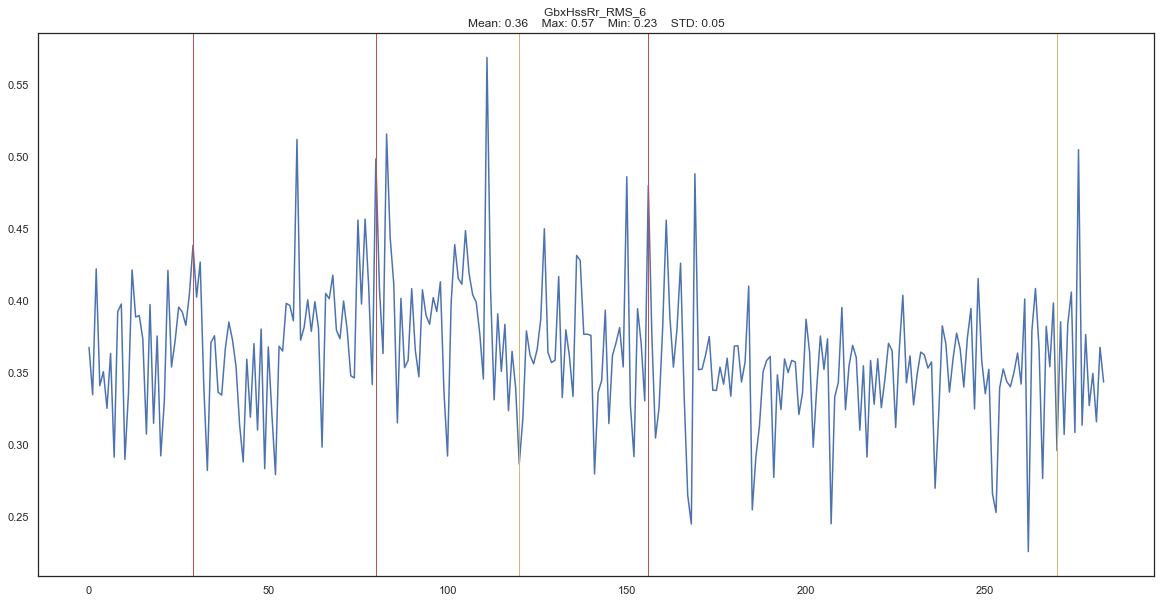

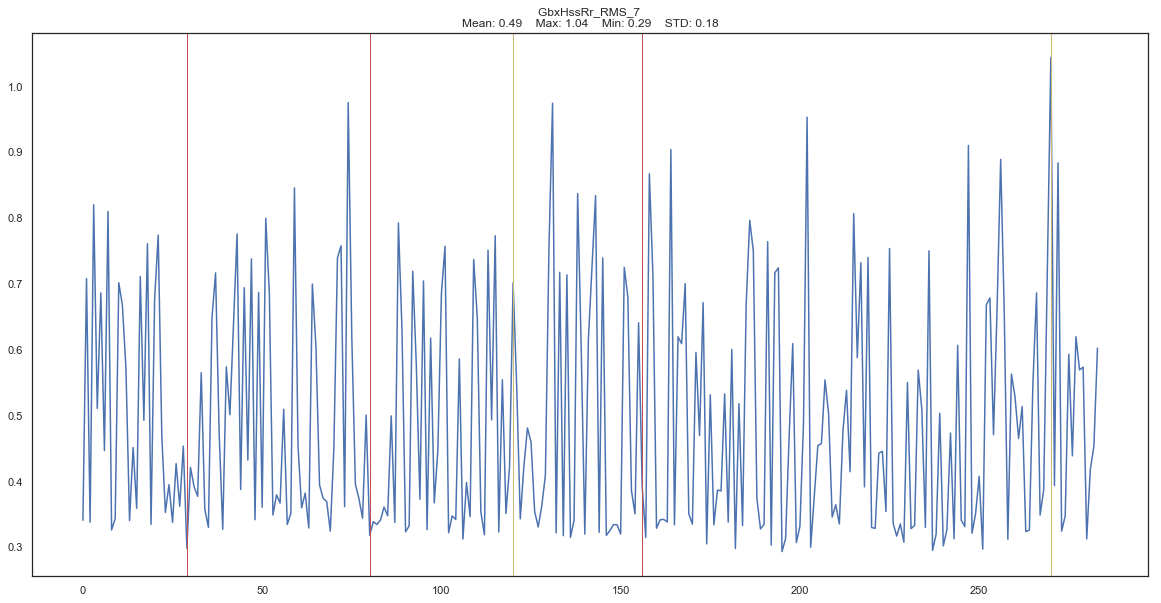

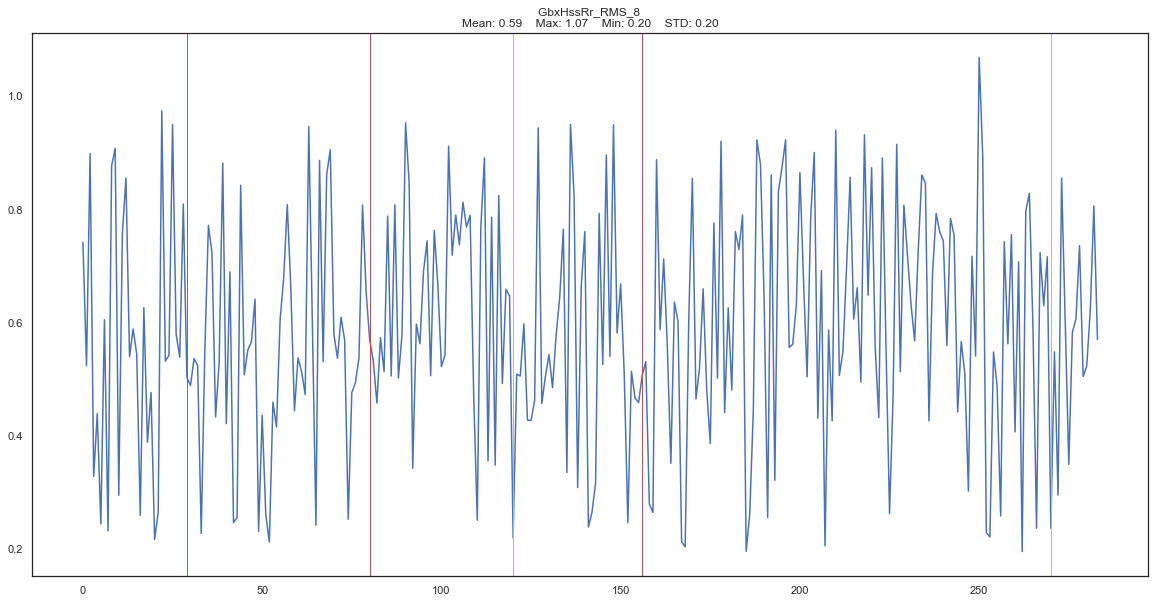

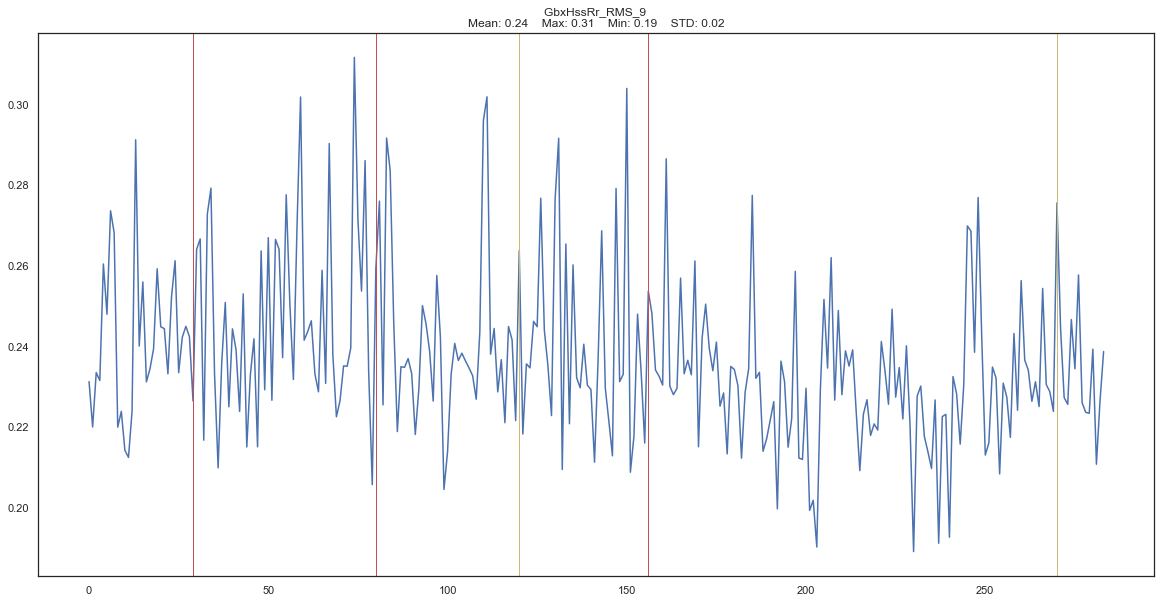

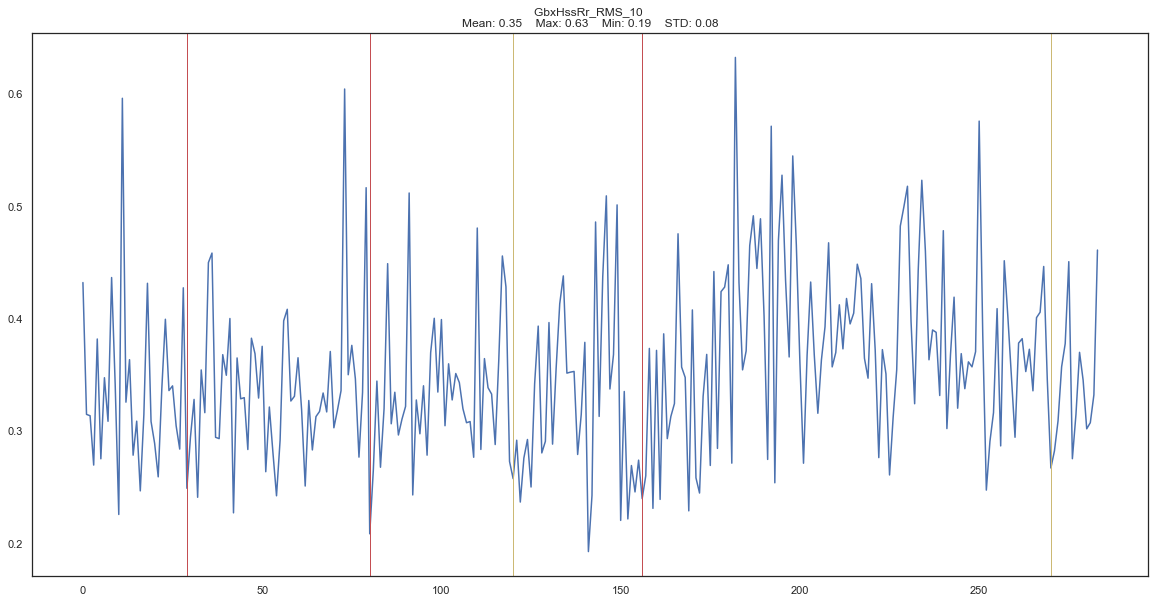

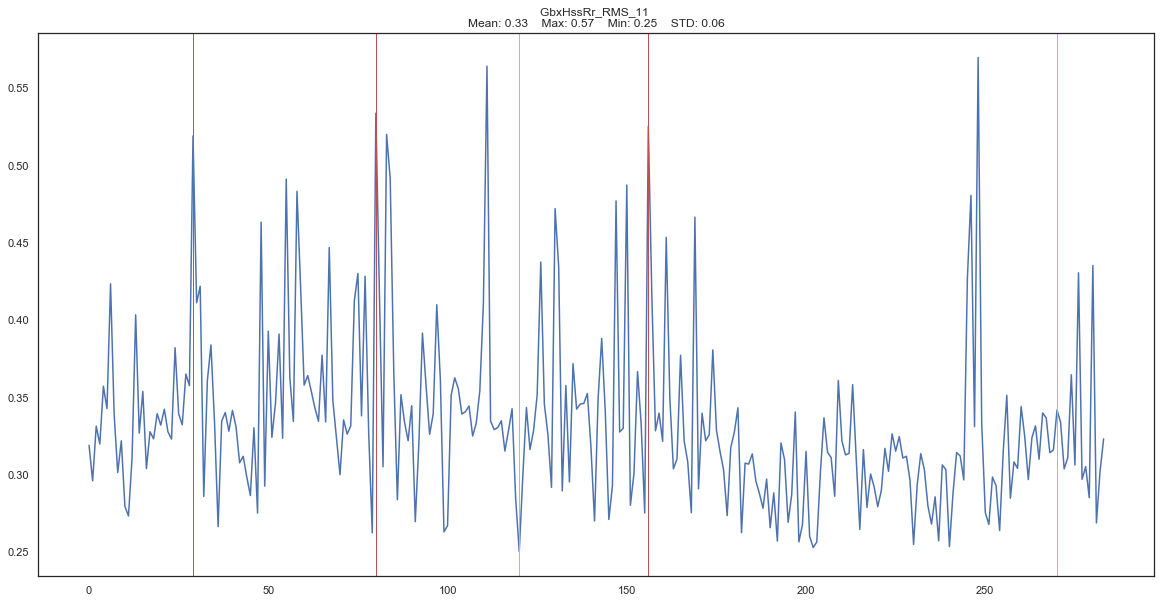

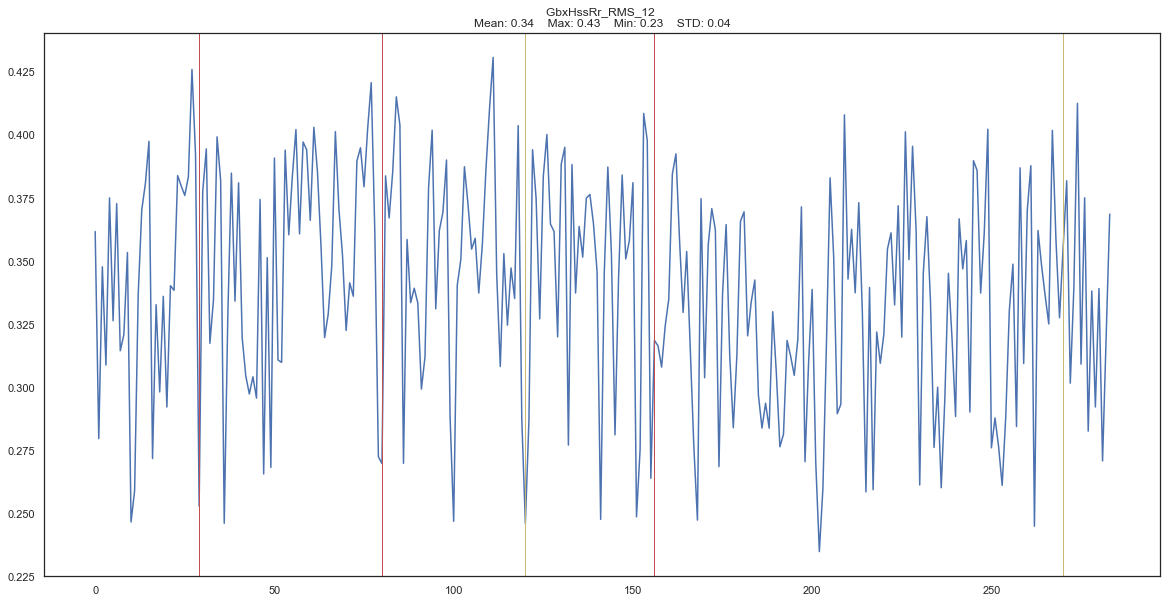

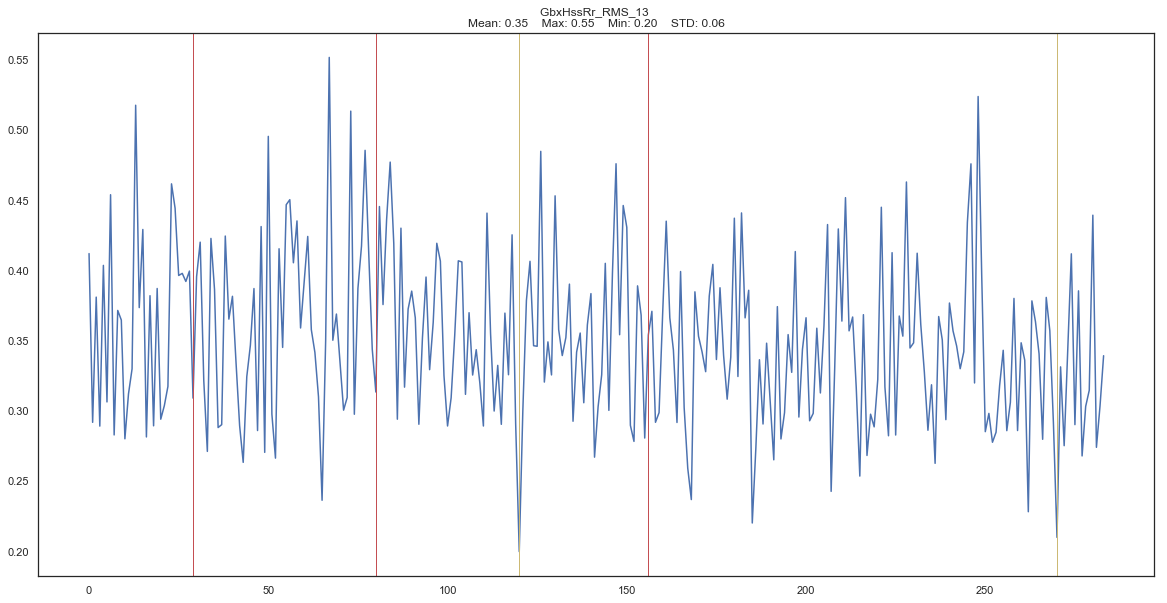

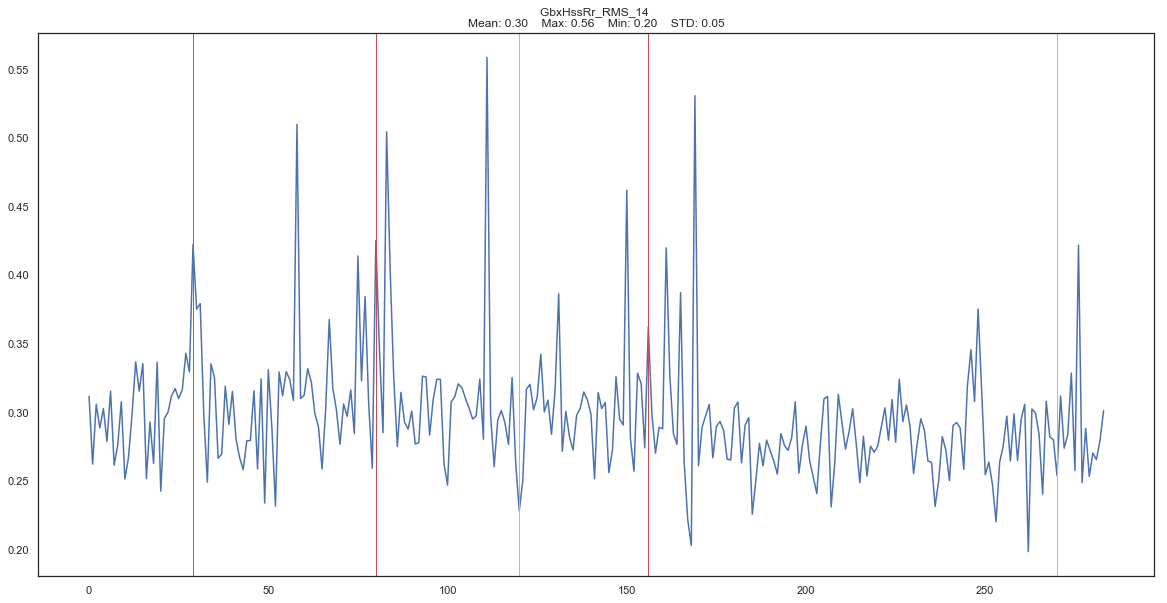

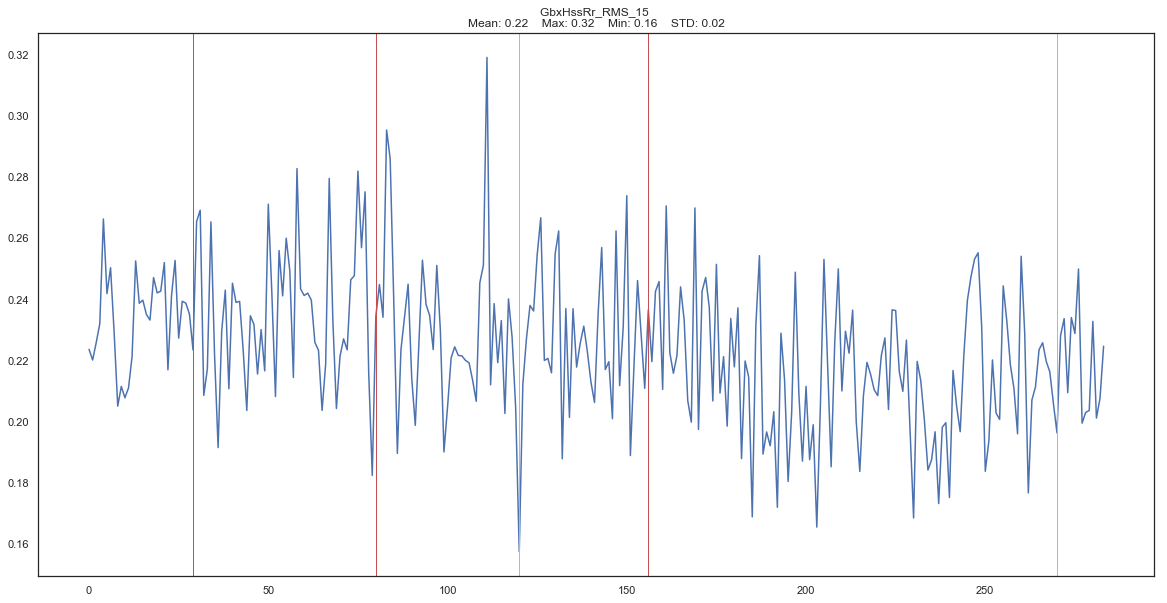

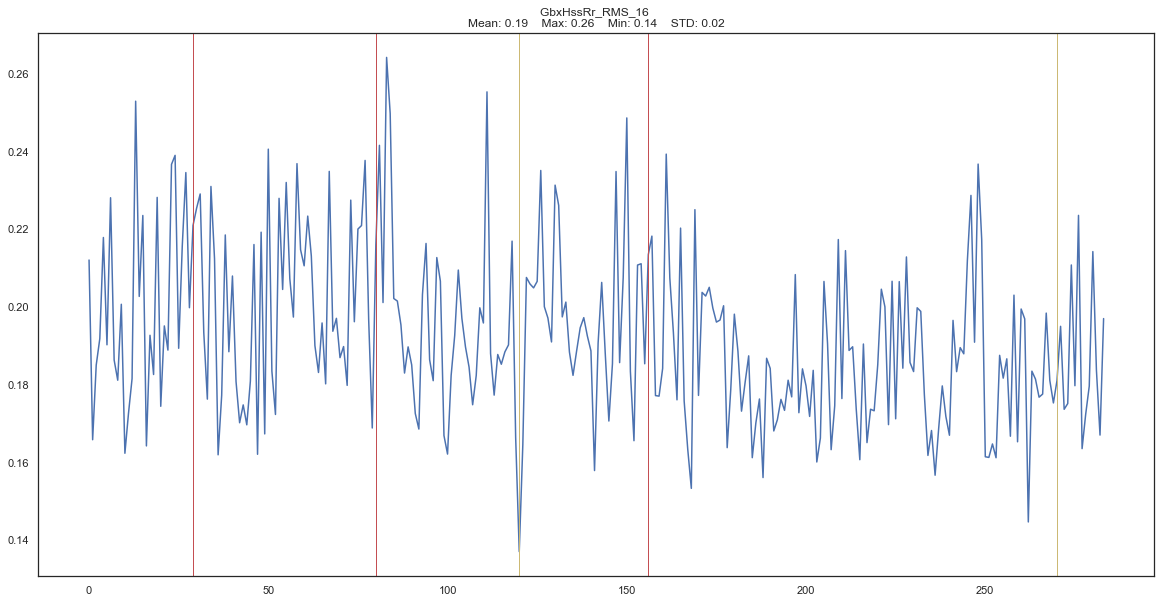

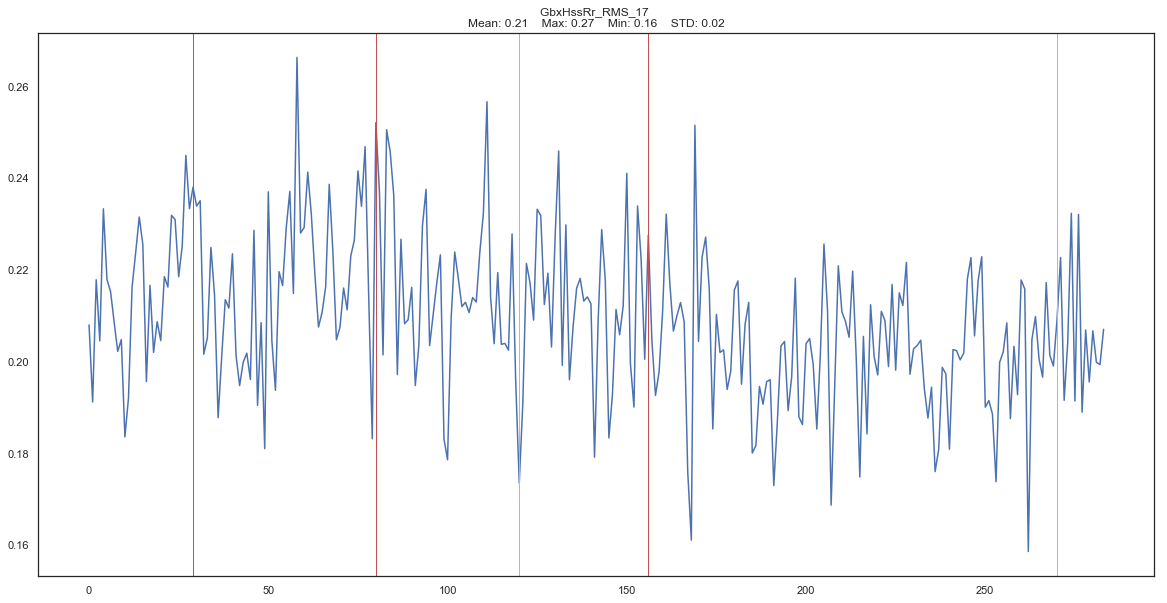

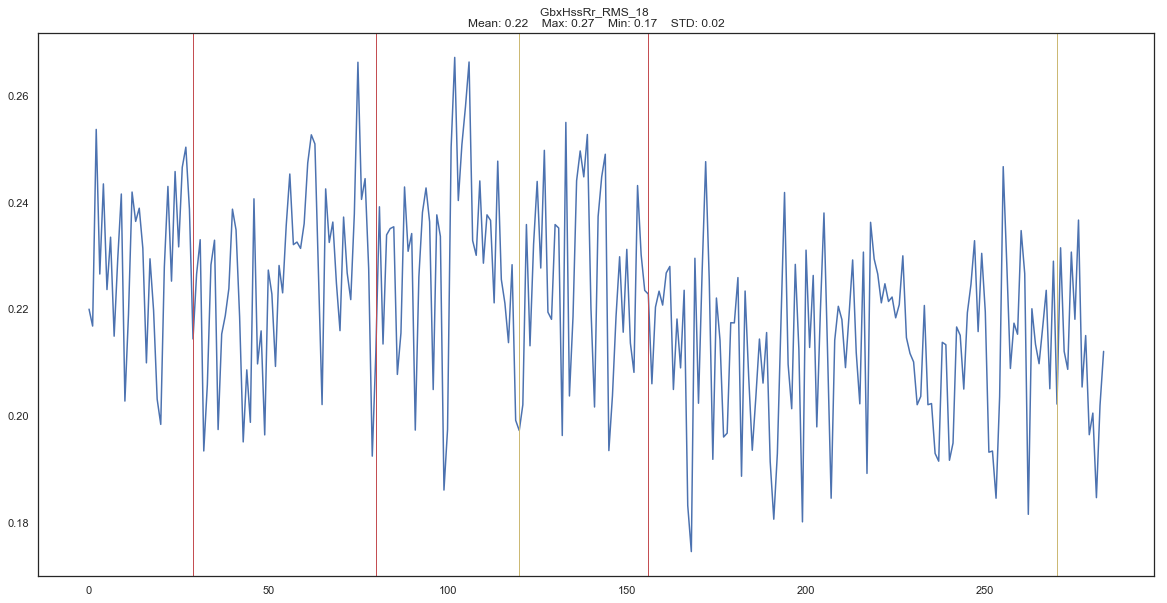

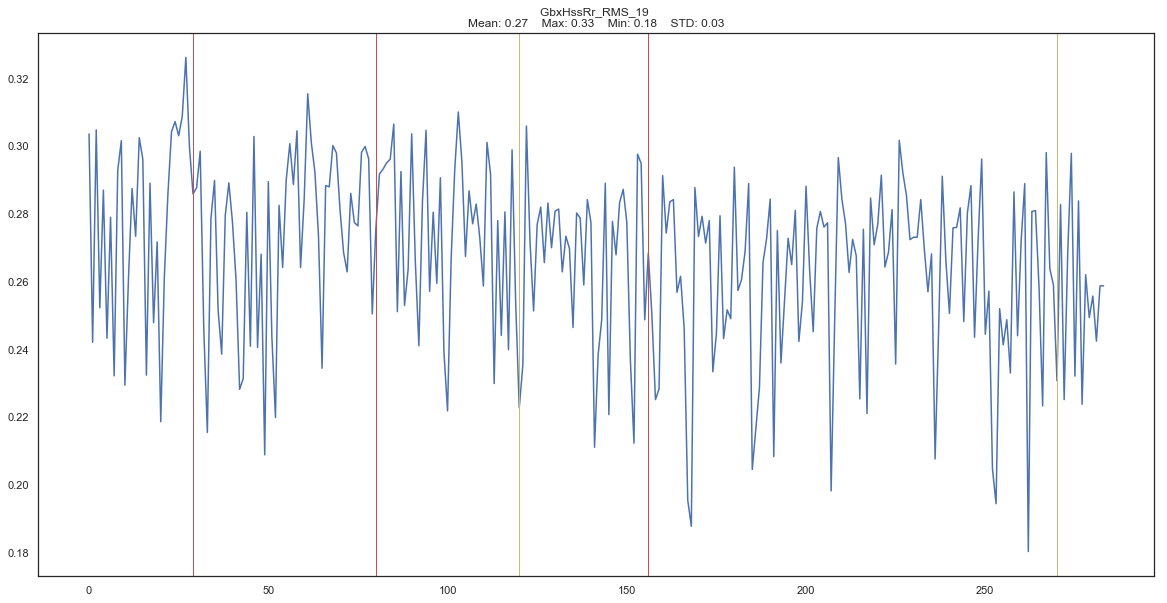

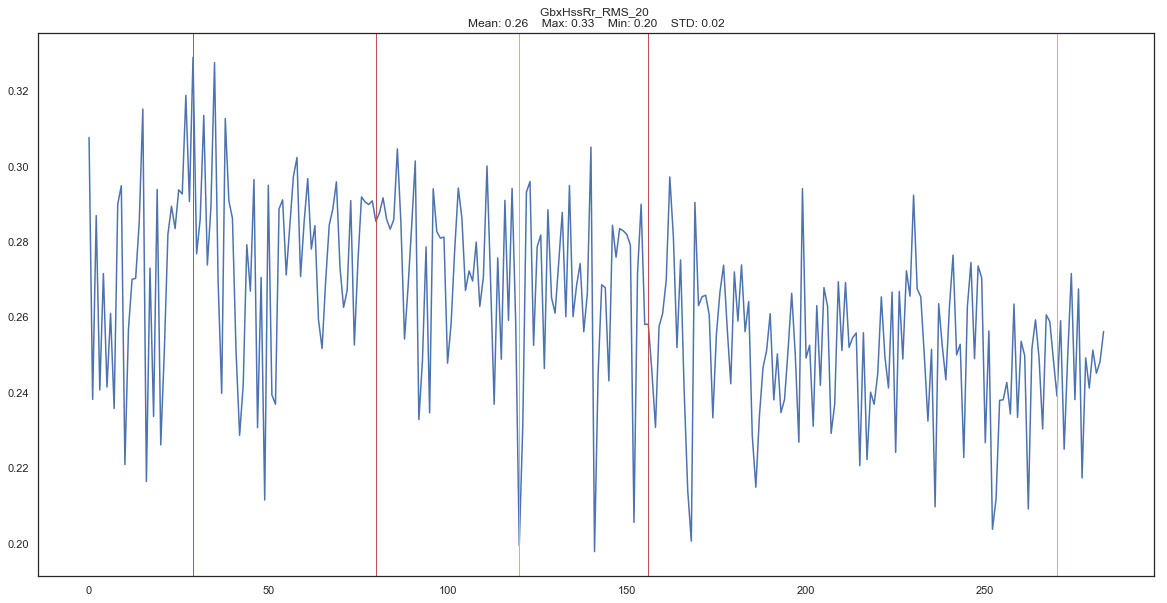

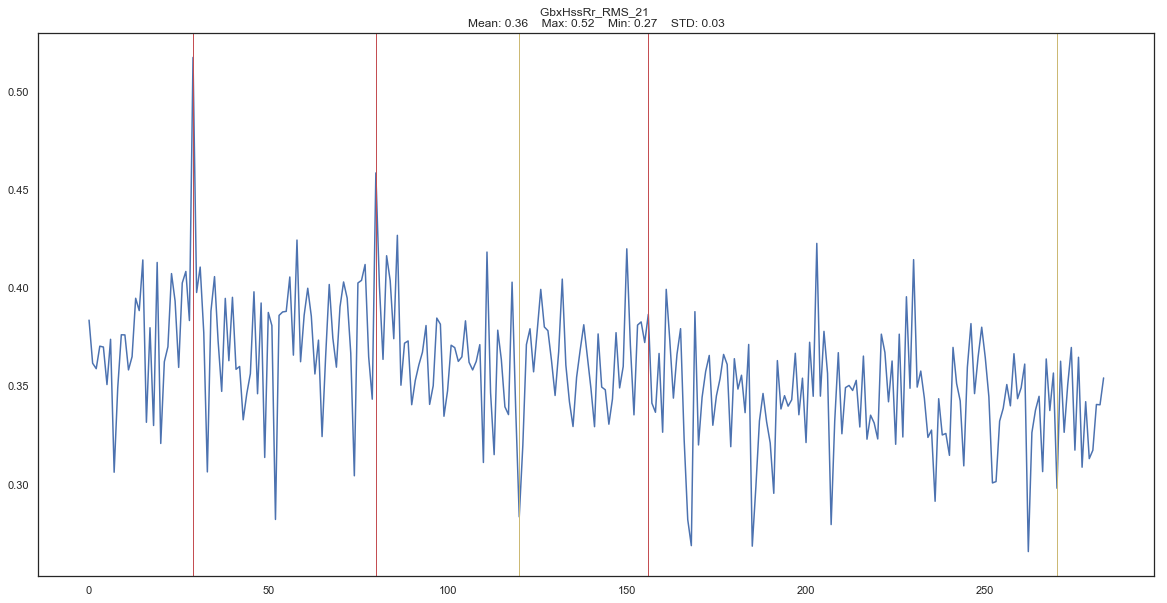

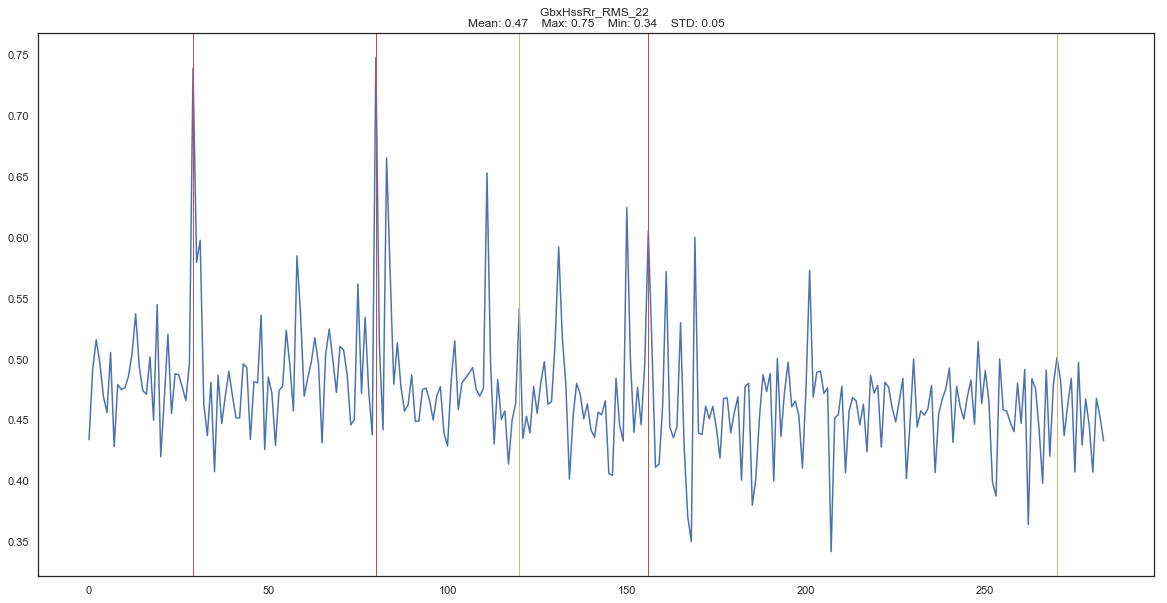

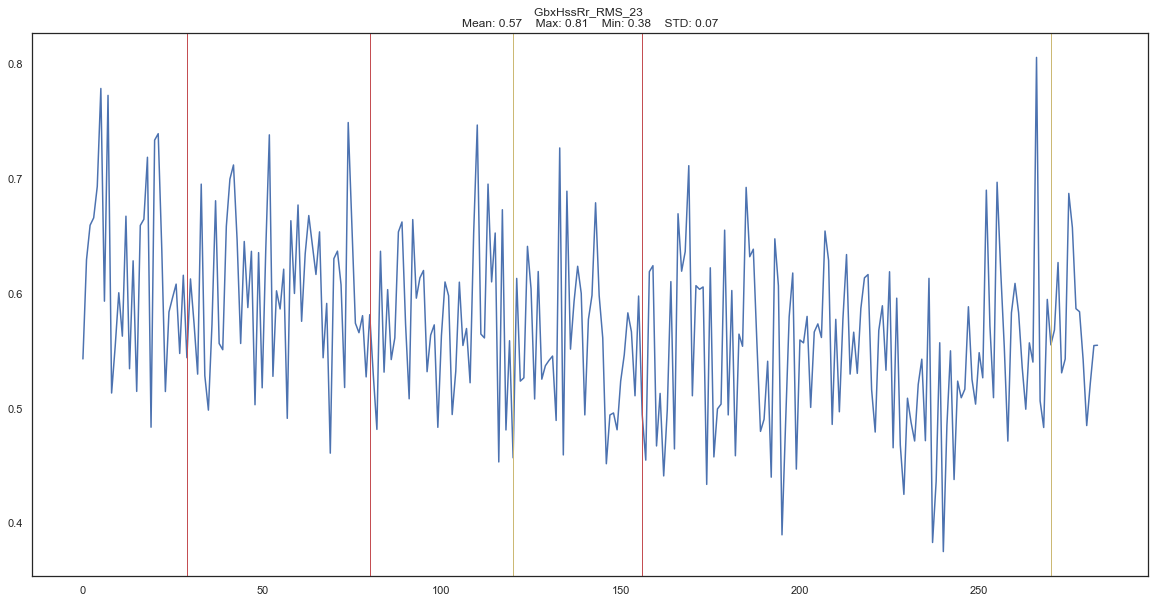

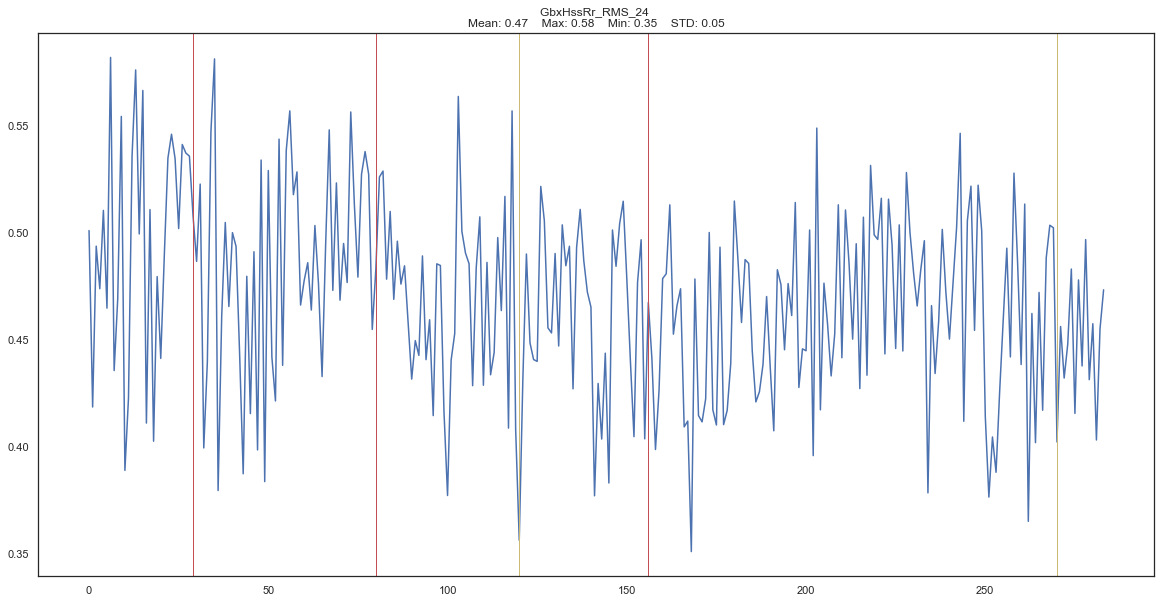

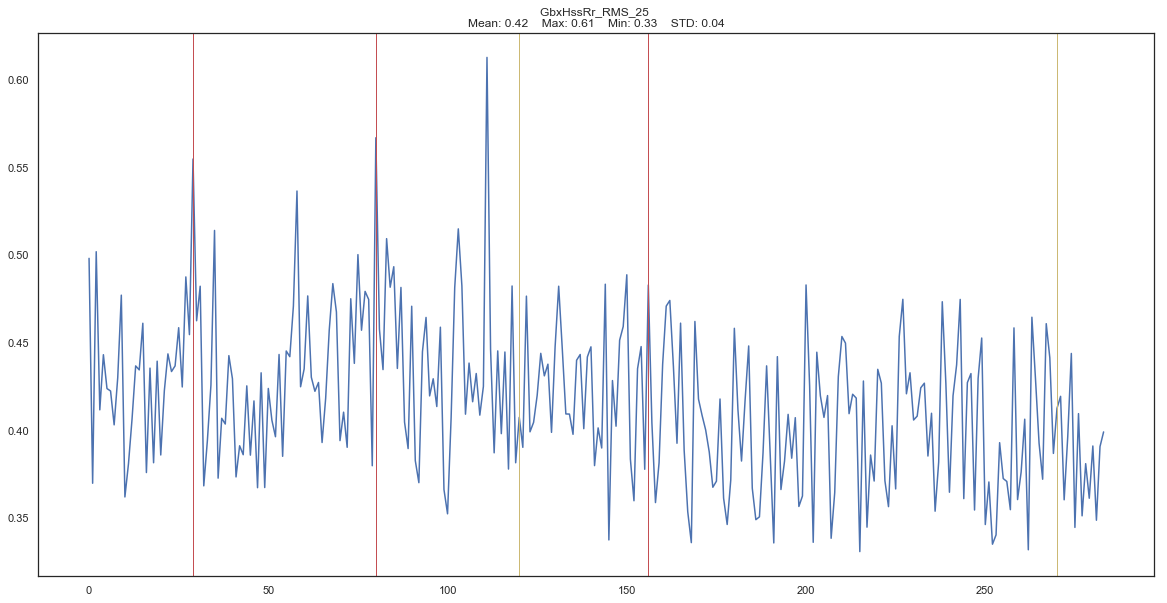

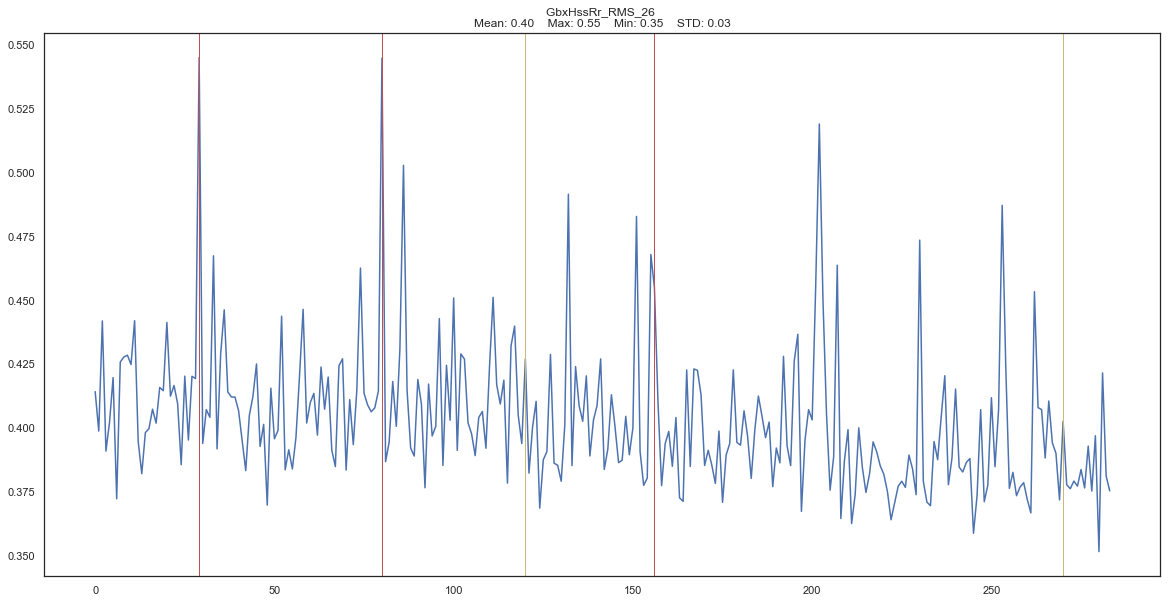

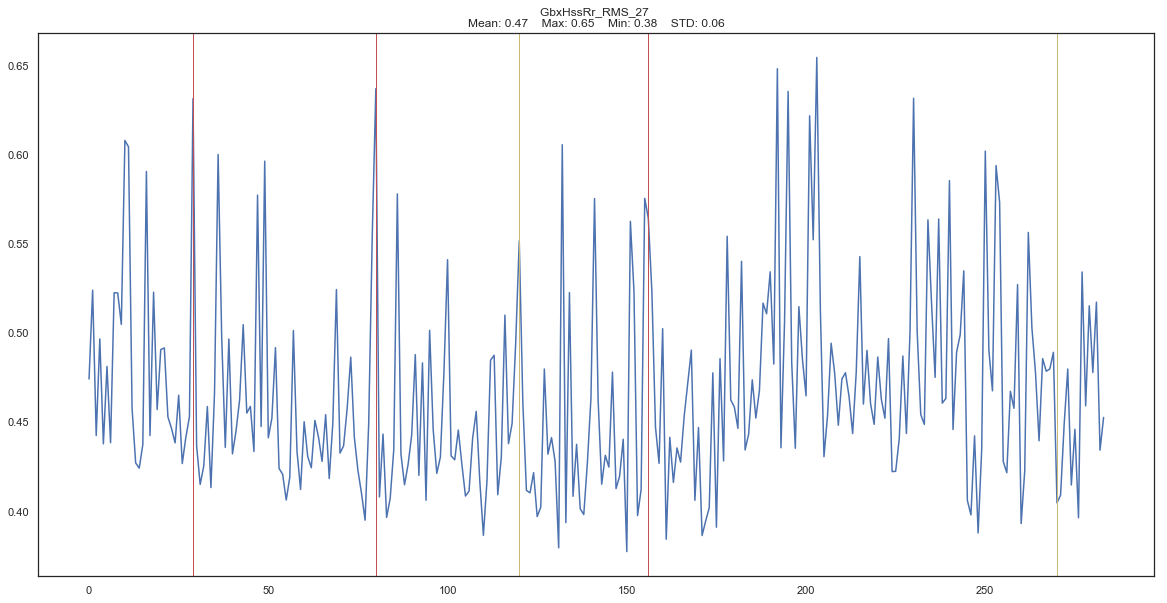

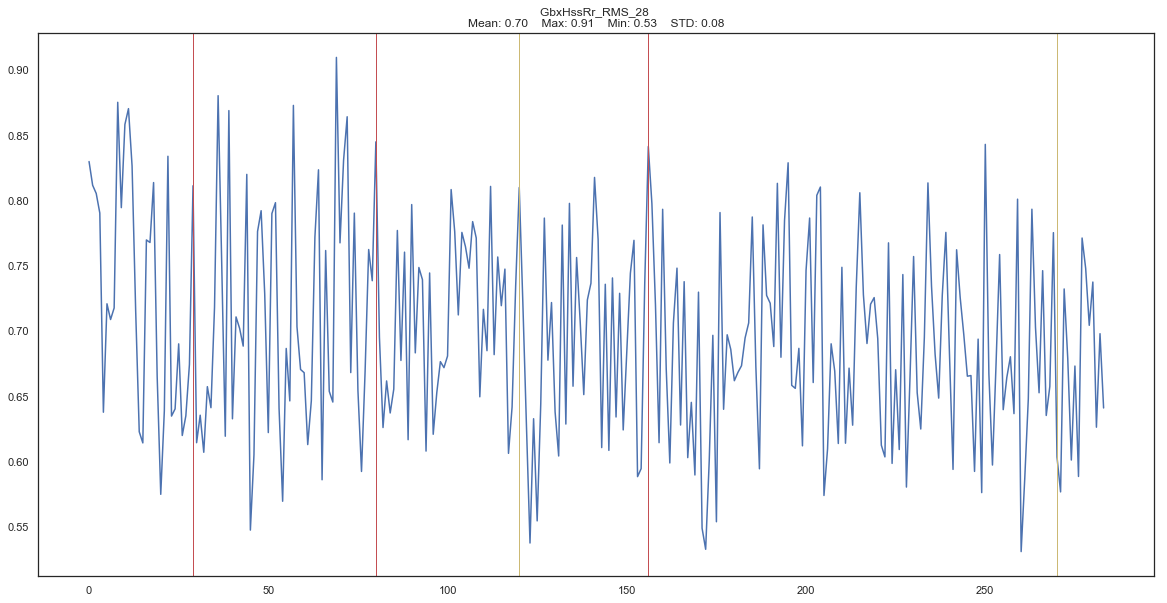

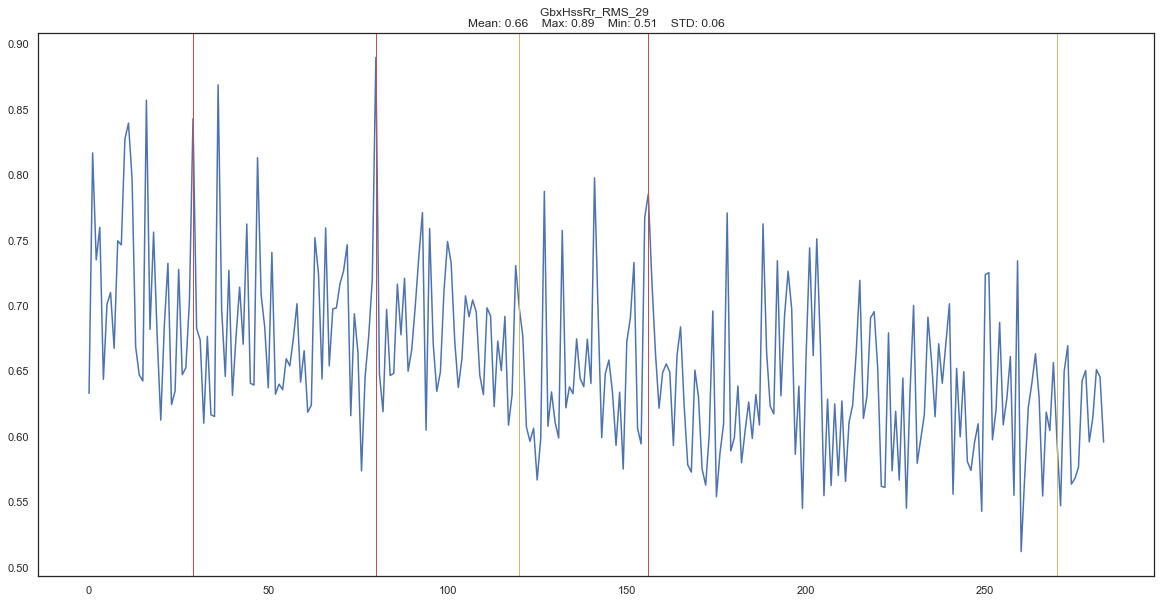

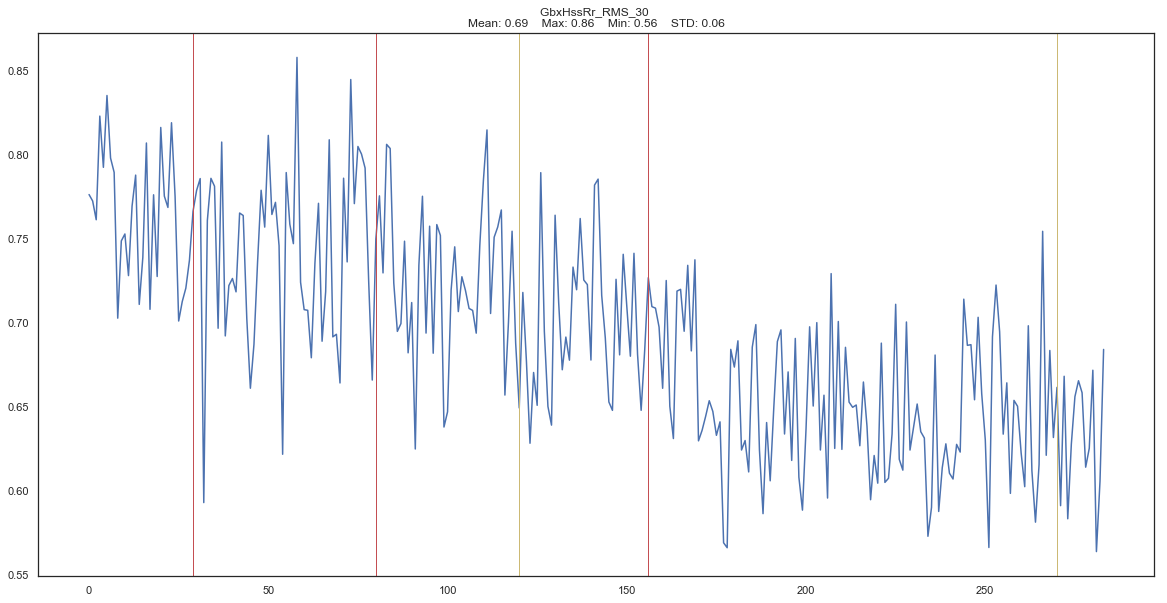

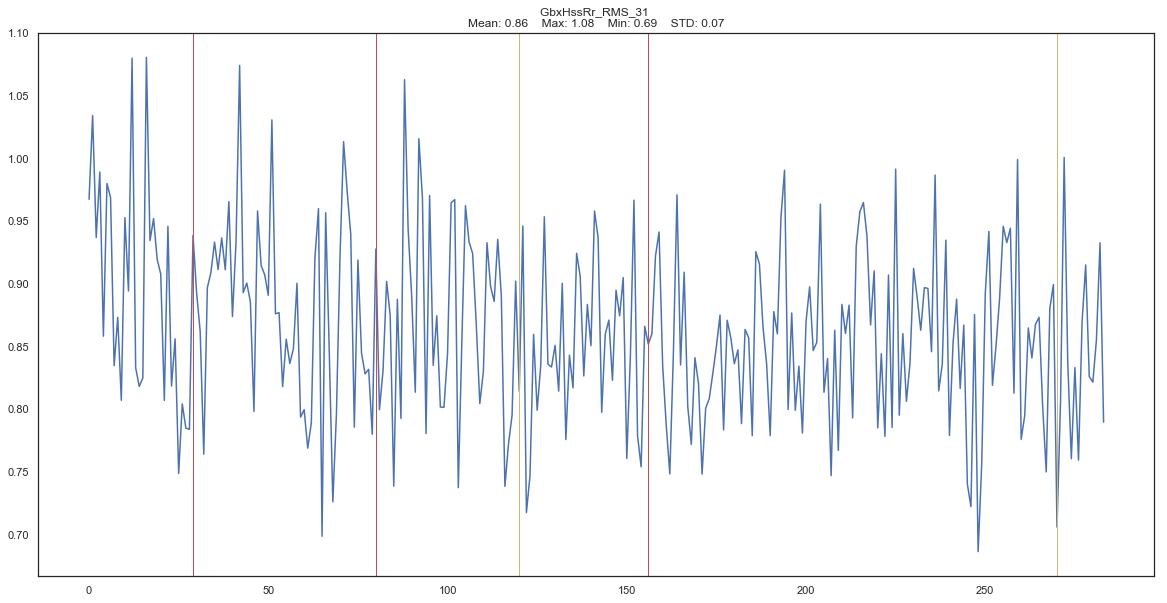

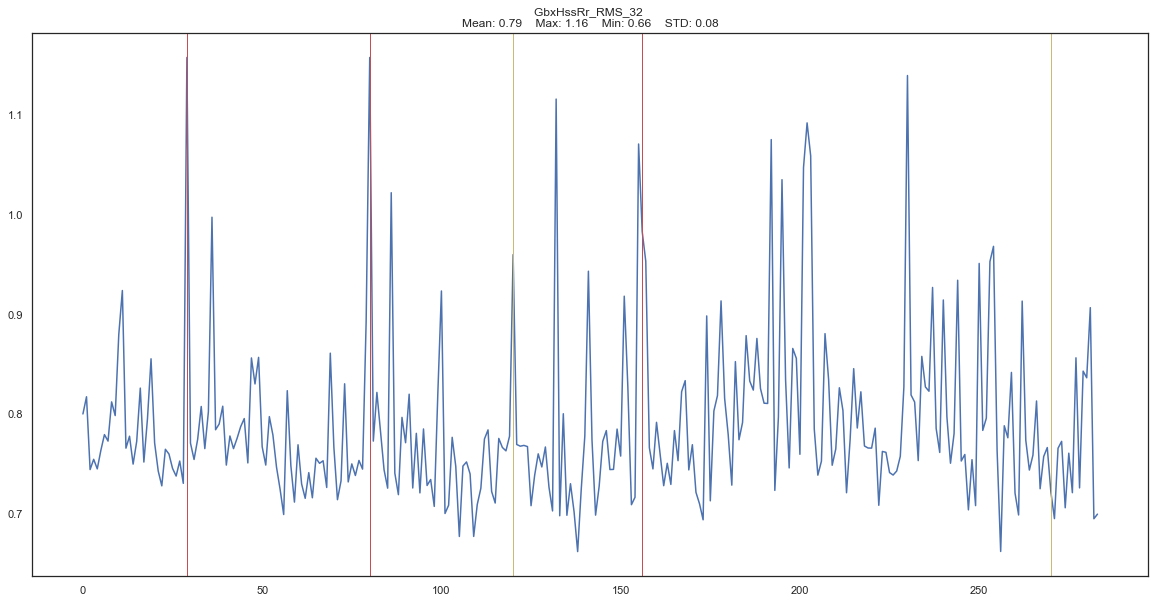

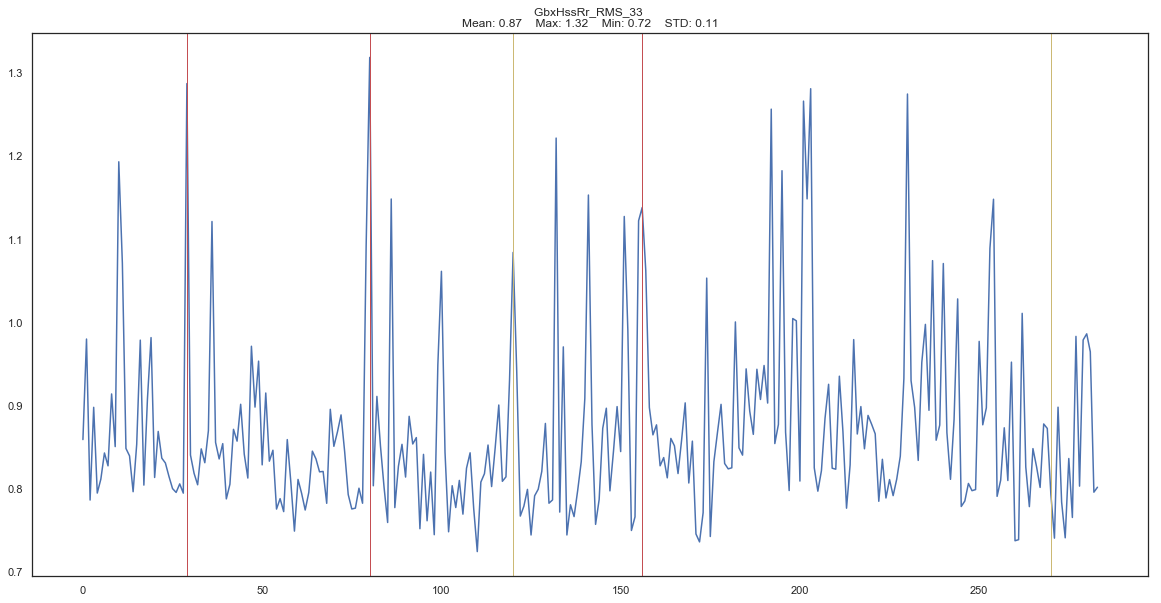

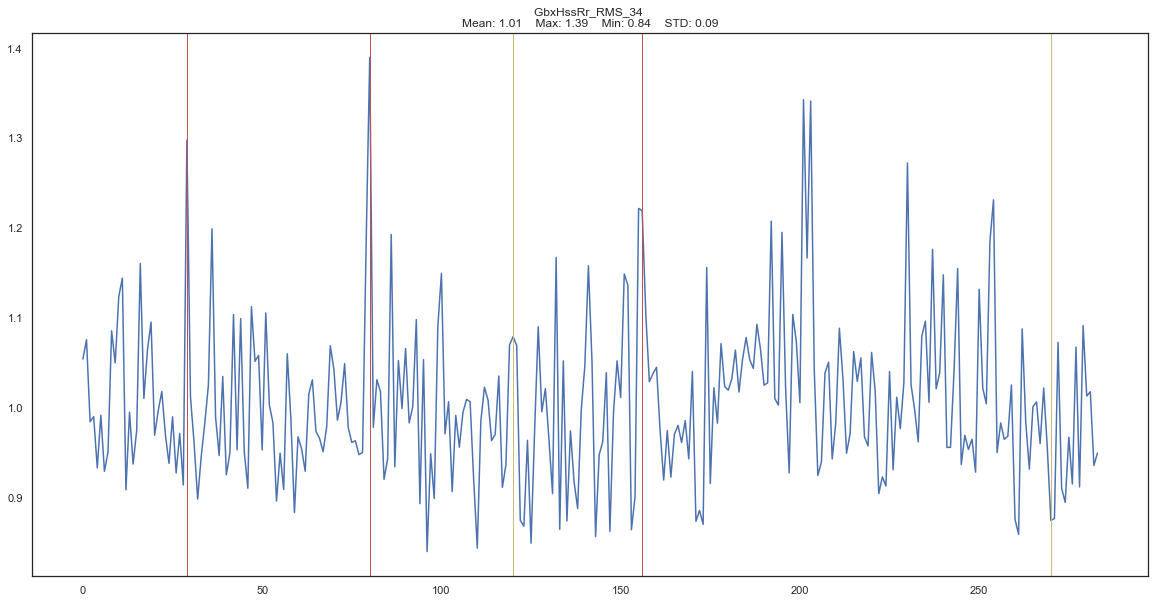

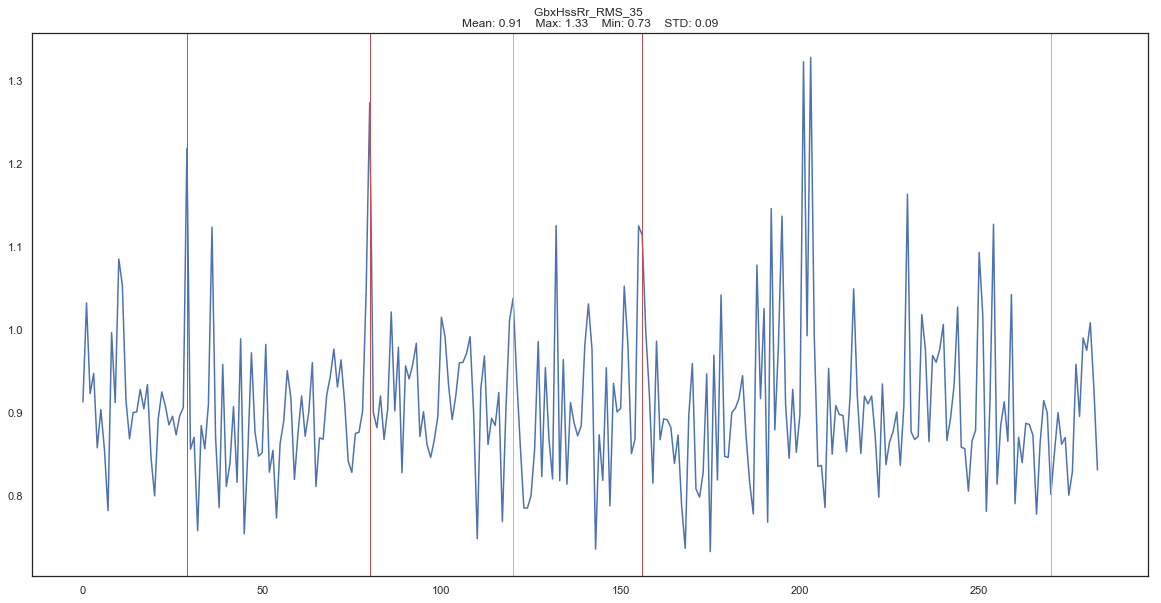

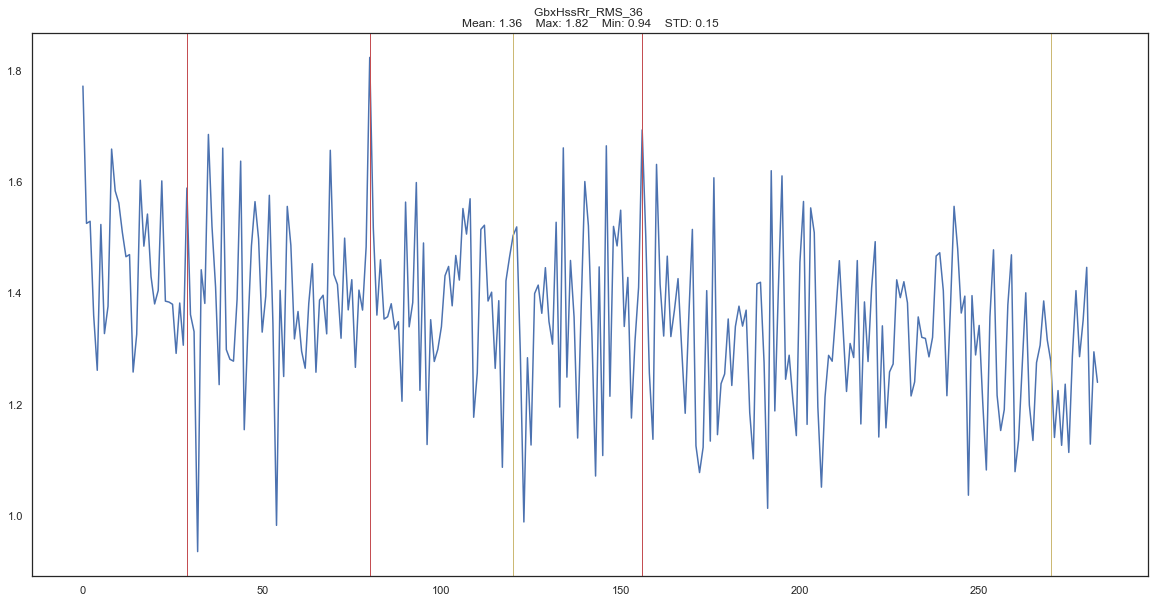

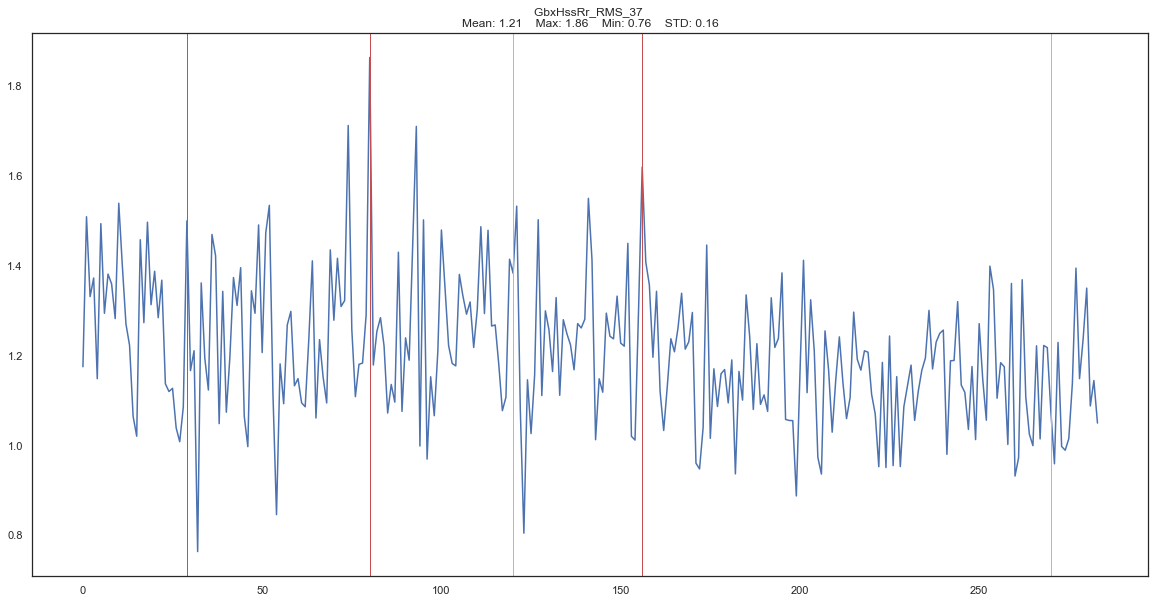

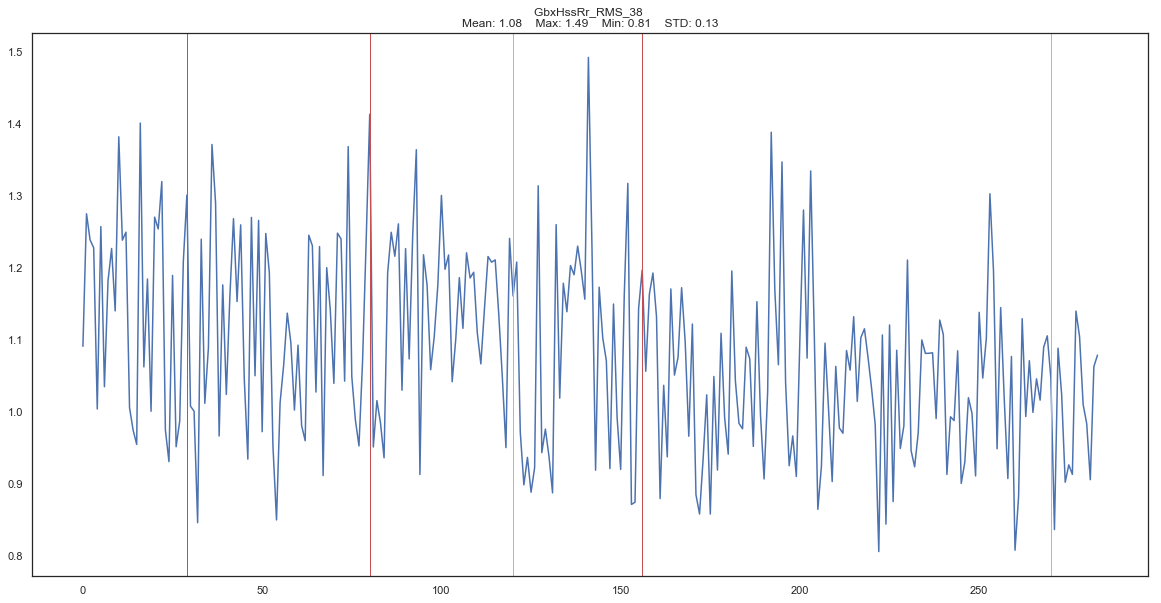

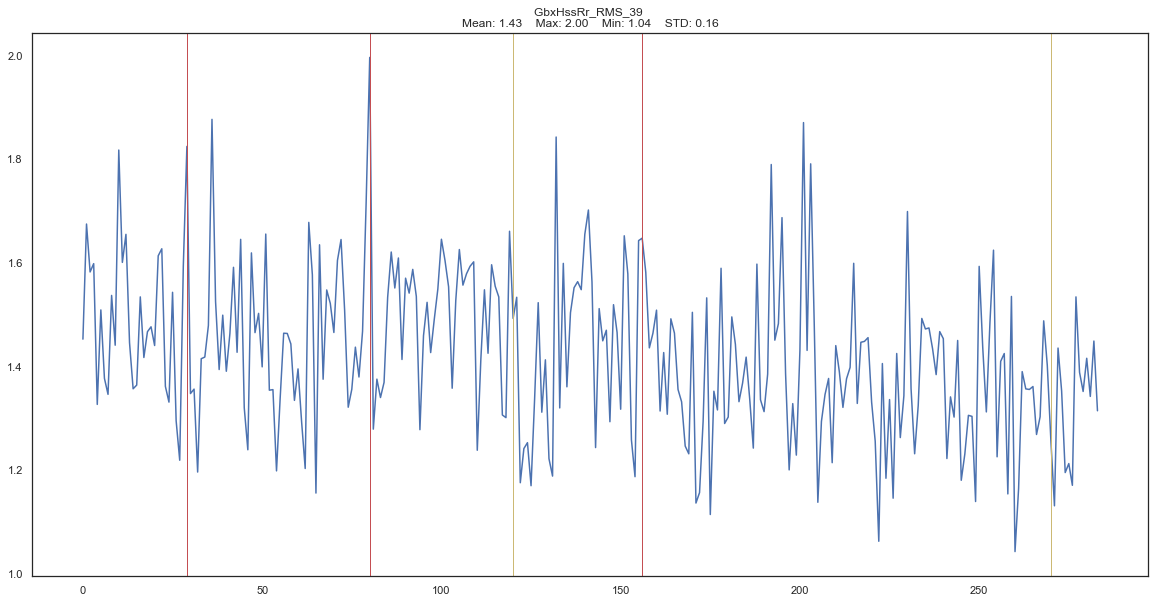

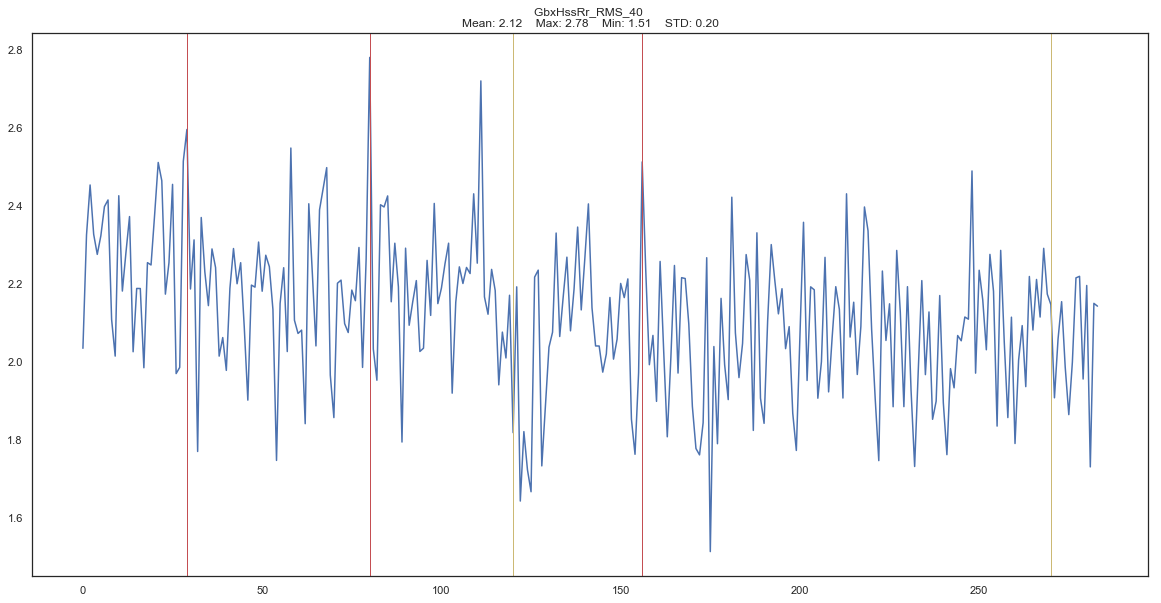

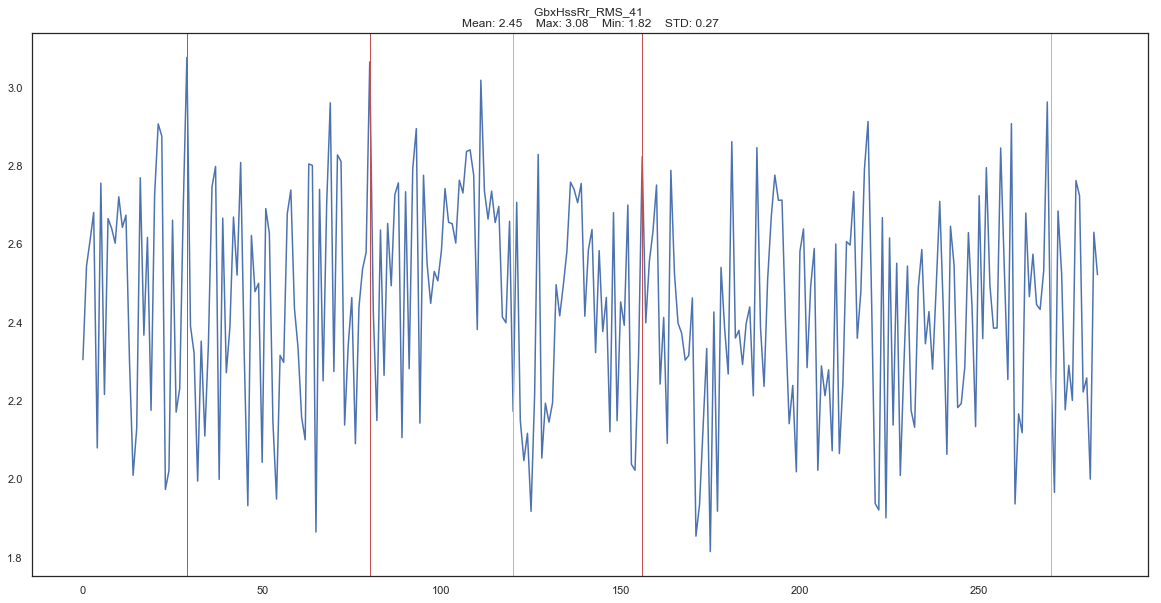

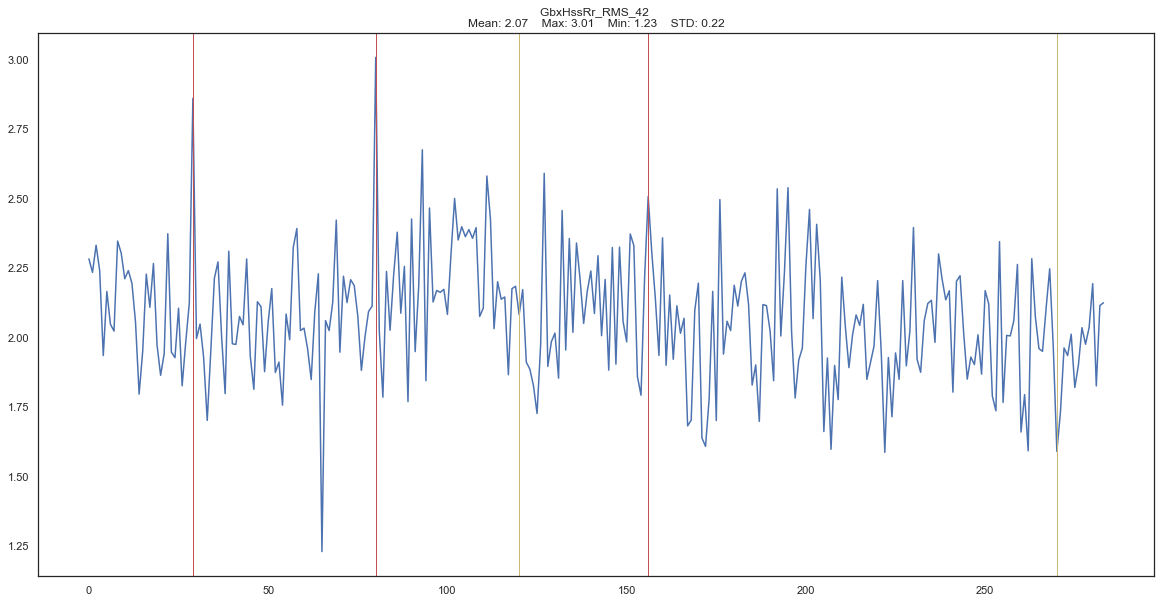

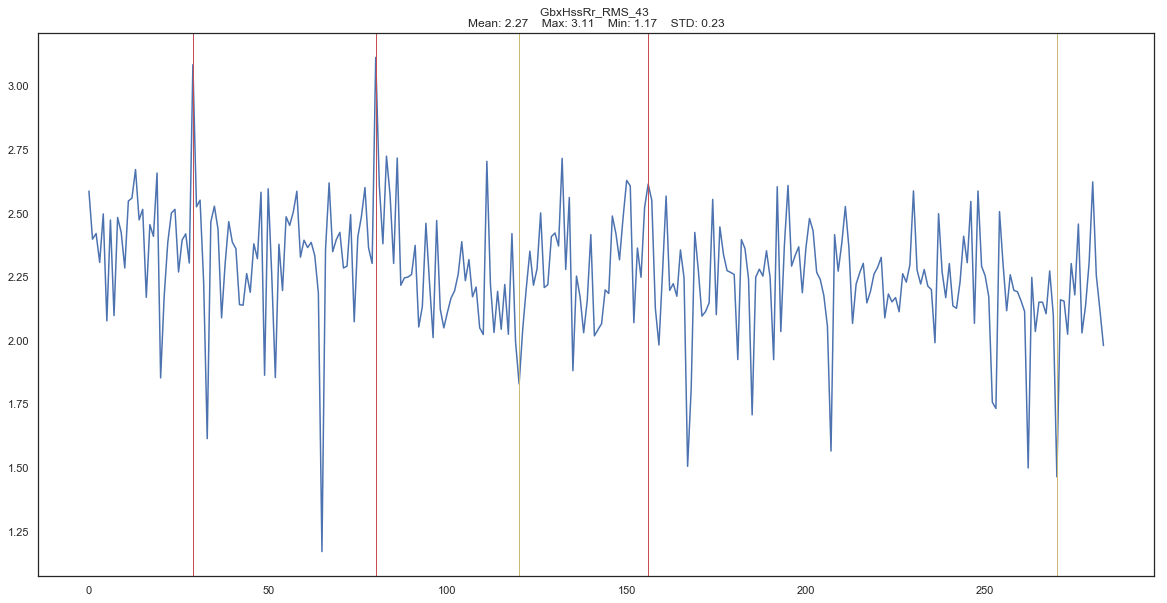

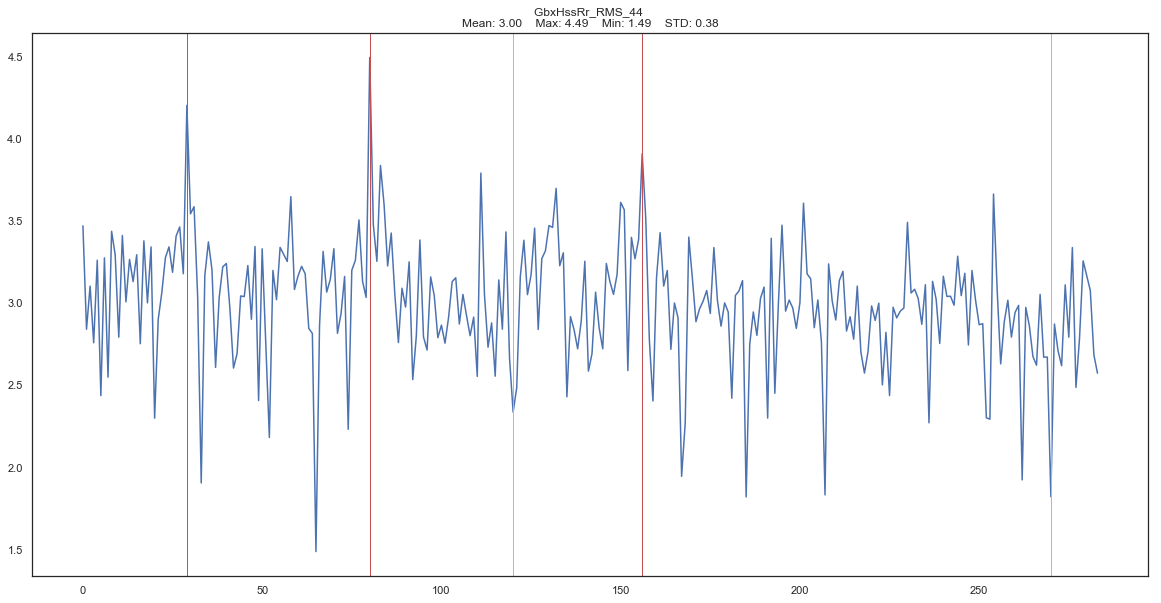

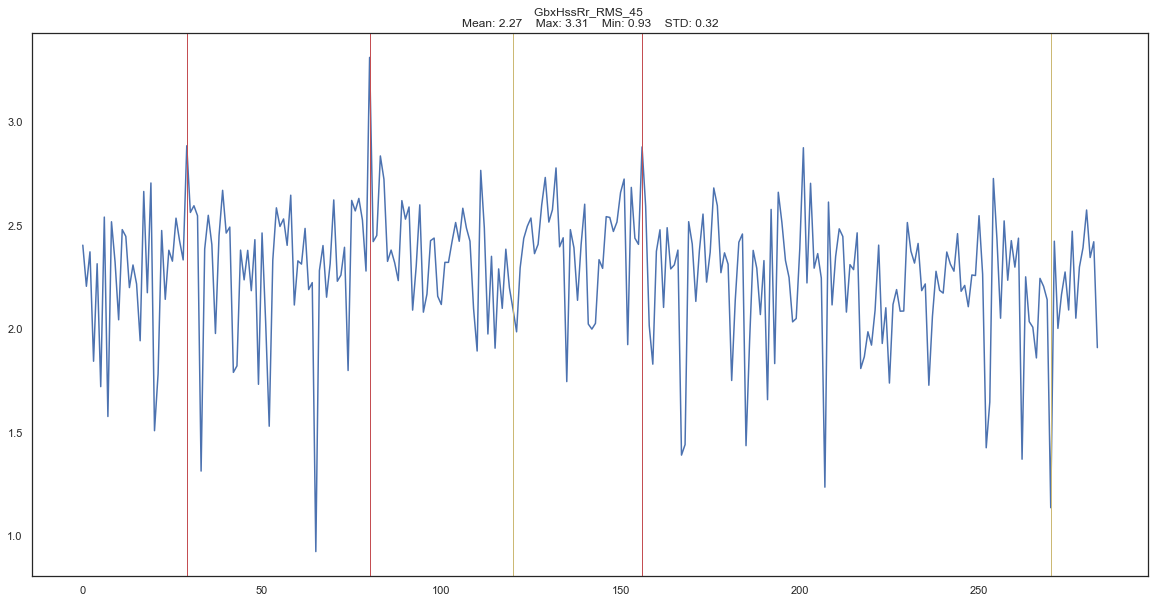

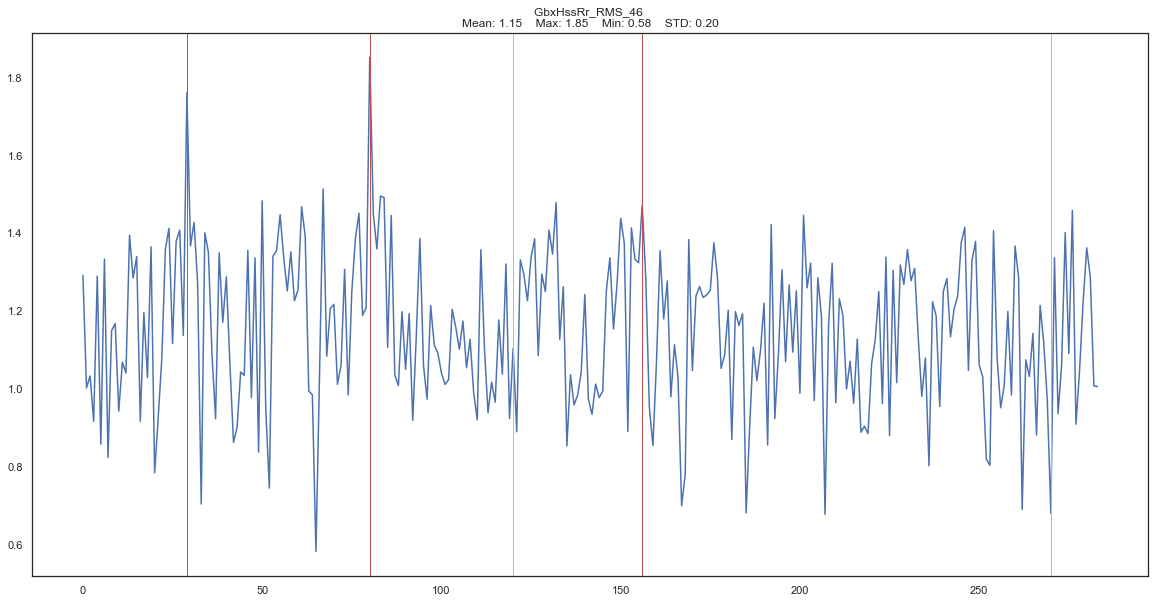

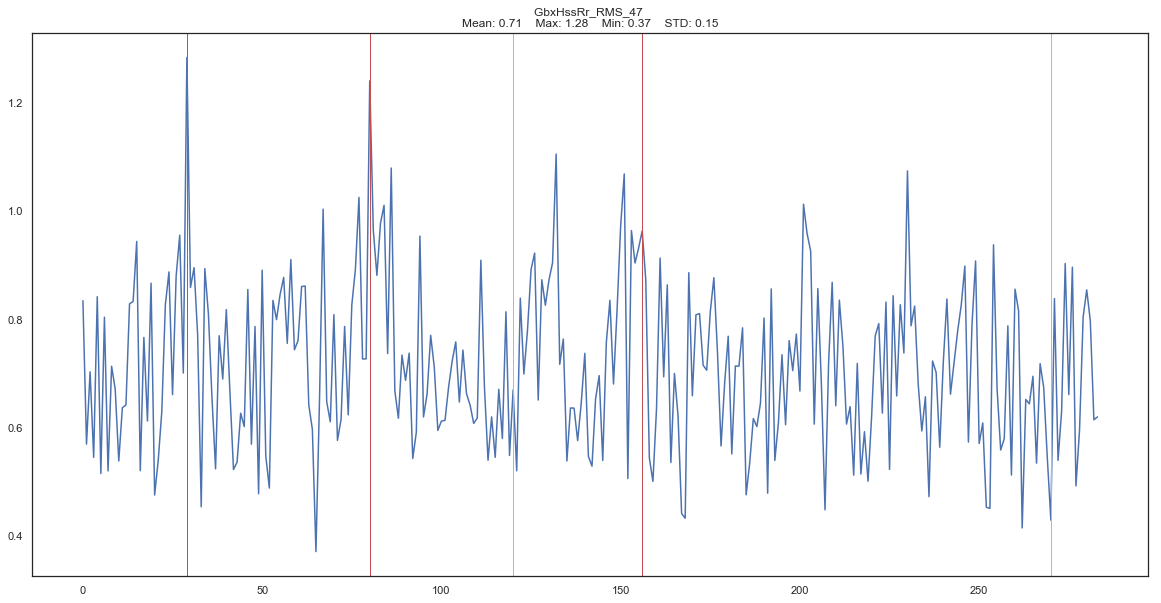

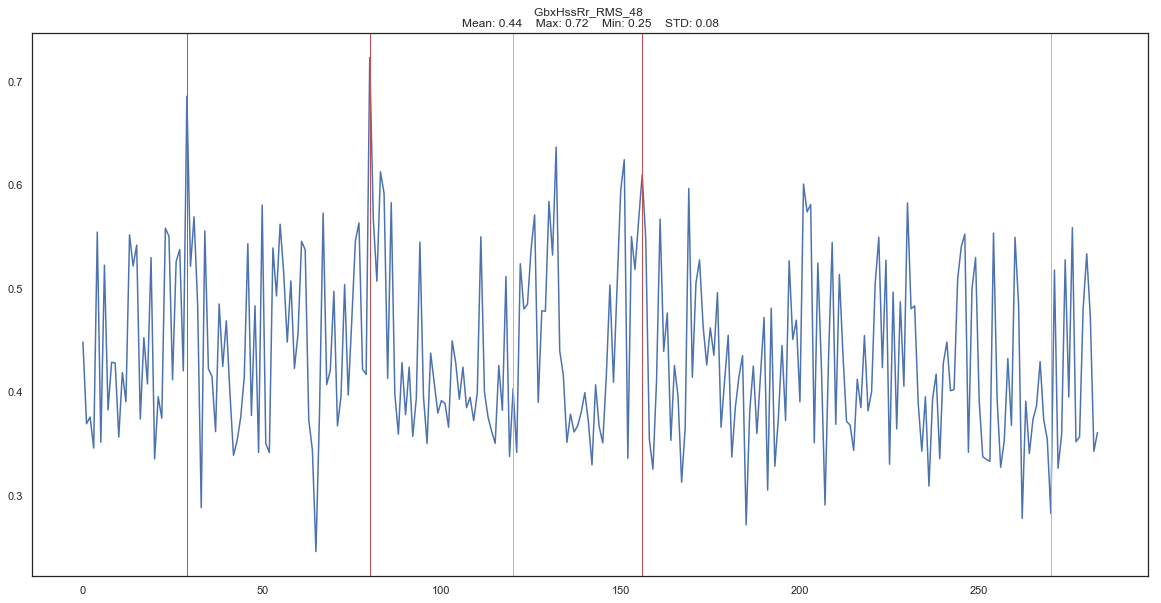

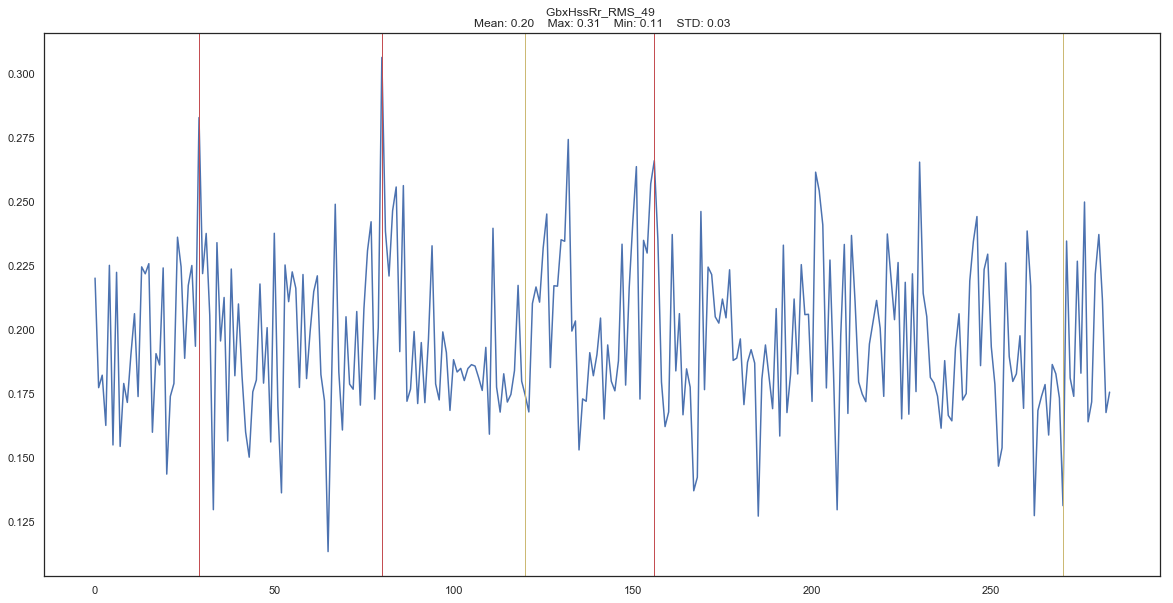

In [51]:
x=np.arange(len(data))
for i, name in enumerate(data.columns):
    plt.figure(figsize=(20,10))
    y = data.values[:,i]
    mean_val = np.mean(y)
    max_val = np.max(y)
    min_val = np.min(y)
    std_val = np.std(y)
    plt.title(f'{name} \nMean: {mean_val:.2f}    Max: {max_val:.2f}    Min: {min_val:.2f}    STD: {std_val:.2f}')
    plt.plot(x, y)
    plt.axvline(x=29, c='r', linewidth=1)
    plt.axvline(x=80,  c='r', linewidth=1)
    plt.axvline(x=120, c='y', linewidth=1)
    plt.axvline(x=156, c='r', linewidth=1)
    plt.axvline(x=270, c='y', linewidth=1)
    plt.show()

In [30]:
print(f"AvgPower value at test sample: {data.iloc[130]['AvgPower']}")
print('\nBlue lines')
print(f"AvgPower value at first high rot speed: {data.iloc[155]['AvgPower']}")
print(f"AvgPower value at second high rot speed: {data.iloc[199]['AvgPower']}")

AvgPower value at test sample: 3293.041015625

Blue lines
AvgPower value at first high rot speed: 3301.466796875
AvgPower value at second high rot speed: 2548.203613281


In [53]:
interesting_intervals = [29, 80, 120, 156, 270]
val = []
for interval in interesting_intervals:
    val.append(float(f"{data.iloc[interval]['AvgPower']:.9f}"))

val

[2728.903564453,
 3181.363525391,
 2593.107421875,
 3297.726318359,
 3003.092773438]

In [54]:
%autoreload
import build_dataset

45


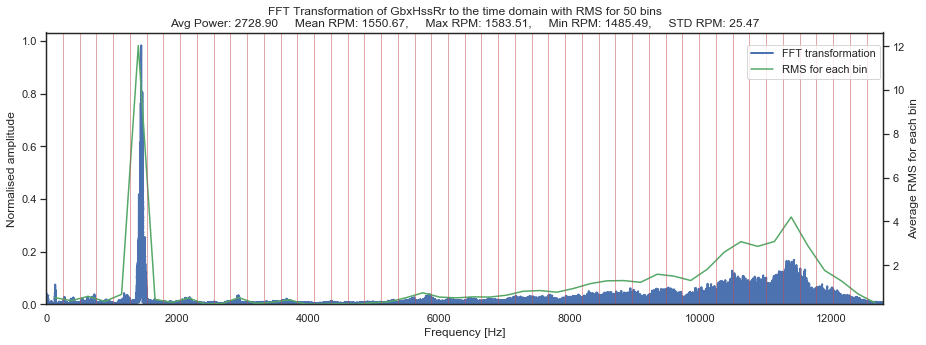

119


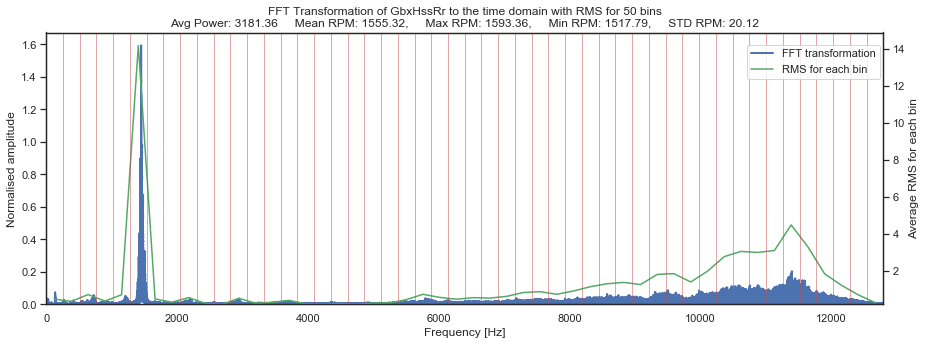

174


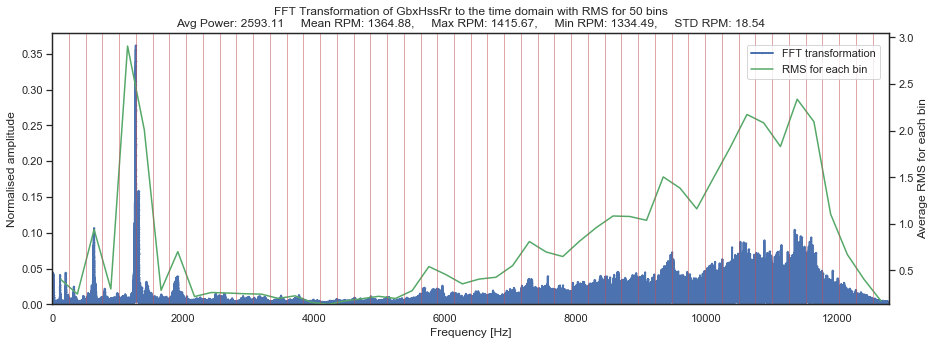

223


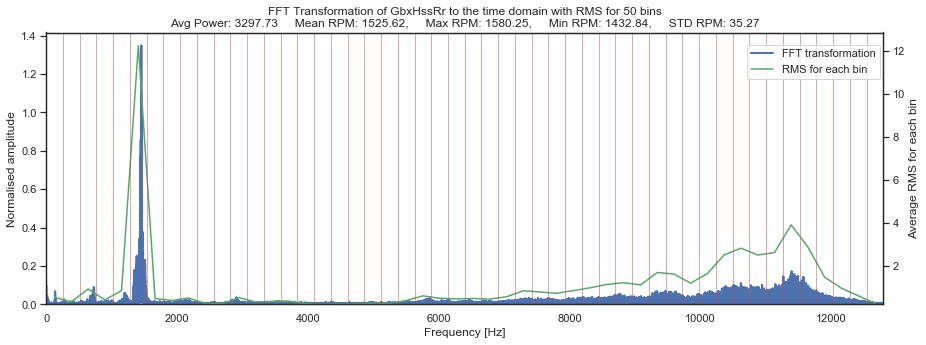

399


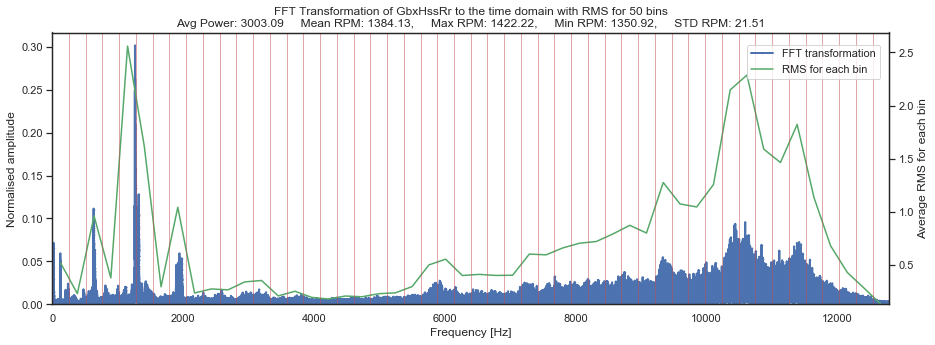

5 / 417 intervals added to dataframe


In [55]:
df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=True, bins=50, 
                                                         plot_vertical_lines=True,
                                                         avg_pwr_values = val)